Nhập dữ liệu và kiểm tra việc tiếp nhận dữ liệu

In [1]:
# Nhập thư viện pandas và gán tên là 'pd'
import pandas as pd

# Đọc một tập tin CSV vào DataFrame bằng pandas
# Đường dẫn đến tập tin CSV là 'C:/Users/GIGABYTE/Downloads/dataset.csv'
# DataFrame kết quả được gán cho biến 'raw'
raw = pd.read_csv('C:/Users/GIGABYTE/file_sampled.csv')

# Hiển thị nội dung của DataFrame 'raw'
raw


,Text,language
0,هذه بغداد لم تكن دار كفر قط وجرى عليها هذا الذ...,Arabic
1,الصوف الذهبي هو صوف خيالي لكبش طائر خيالي تناق...,Arabic
2,دهرانة محلة تابعة لقرية عنقب التابعة لعزلة بني...,Arabic
3,"أدان البابا ""الاستغلال الجائر"" للموارد الطبيعي...",Arabic
4,قامت داعش بتدمير مرقدي النبي يونس والنبي شيت إ...,Arabic
...,...,...
10995,تم نے اپنا عقیدہ بیان کر دیا اب میری باری ہے ک...,Urdu
10996,تاریخ الاسلام یہ علامہ ذہبی کی تاریخ ہے جو بیس...,Urdu
10997,آپ صورت و سیرت میں سلف صالحین کی جیتی جاگتی تص...,Urdu
10998,بعد ازاں جوزف سٹالن کے دور میں سوویت ثقافت کو ...,Urdu


In [2]:
# Ngôn ngữ
languages = set(raw['language'])
print('Languages', languages)
print('========')

# Ví dụ về nhiều ngôn ngữ được lấy từ đầu và cuối
print('Swedish & English:', raw['Text'][1])
print('Thai & English:', raw['Text'][2])
print('Chinese & English:', raw['Text'][100])


Languages {'Persian', 'Portugese', 'Turkish', 'Arabic', 'Urdu', 'Indonesian', 'English', 'Japanese', 'Swedish', 'French', 'Estonian', 'Russian', 'Latin', 'Hindi', 'Dutch', 'Spanish', 'Romanian', 'Tamil', 'Korean', 'Pushto', 'Thai', 'Chinese'}
Swedish & English: الصوف الذهبي هو صوف خيالي لكبش طائر خيالي تناقلته الأساطير اليونانية كان هذا الصوف موضوع بحث مشهور قام به البطل اليوناني الخرافي جاسون ومجموعة من الرجال تدعى بحارو الأرغو
Thai & English: دهرانة محلة تابعة لقرية عنقب التابعة لعزلة بني هات بمديرية العدين إحدى مديريات محافظة إب في الجمهورية اليمنية بلغ تعداد سكانها  حسب تعداد اليمن لعام 
Chinese & English: تأسس المركز العالمي للأبحاث الصيدلانية iprc سنة  في عمان - الأردن كمركز لإجراء دراسات التكافؤ الحيوي لشركات الأدوية المحلية والعربية والعالمية وأصبح فيما بعد جزء من مجموعة الحكمة للاستثمار المالكة لشركة أدوية الحكمة وغيرها من الشركات المتخصصة في مجال الأدوية من حيث التطوير والتصنيع والتسويق


Tiền xử lý dữ liệu và kiểm tra kết quả sau khi đã xử lý

In [3]:
import re
import unicodedata
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def clean_text(text):
    # Loại bỏ các thẻ HTML nếu có
    text = re.sub(r'<.*?>', '', text)
    
    # Loại bỏ các địa chỉ URL
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Loại bỏ dấu câu
    text = re.sub(r'[^\w\s]', '', text)
    
    # Loại bỏ các từ dừng
    stopWords = ENGLISH_STOP_WORDS
    text = ' '.join([word for word in text.split() if word not in stopWords])
    
    return text


In [4]:
# In ra một mẫu của cột 'Text' trước khi làm sạch
print("Before cleaning:")
print(raw['Text'].head())

# Áp dụng hàm clean_text cho cột 'Text'
raw['Text'] = raw['Text'].apply(clean_text)

# In ra một mẫu của cột 'Text' sau khi làm sạch
print("\nAfter cleaning:")
print(raw['Text'].head())


Before cleaning:
0    هذه بغداد لم تكن دار كفر قط وجرى عليها هذا الذ...
1    الصوف الذهبي هو صوف خيالي لكبش طائر خيالي تناق...
2    دهرانة محلة تابعة لقرية عنقب التابعة لعزلة بني...
3    أدان البابا "الاستغلال الجائر" للموارد الطبيعي...
4    قامت داعش بتدمير مرقدي النبي يونس والنبي شيت إ...
Name: Text, dtype: object

After cleaning:
0    هذه بغداد لم تكن دار كفر قط وجرى عليها هذا الذ...
1    الصوف الذهبي هو صوف خيالي لكبش طائر خيالي تناق...
2    دهرانة محلة تابعة لقرية عنقب التابعة لعزلة بني...
3    أدان البابا الاستغلال الجائر للموارد الطبيعية ...
4    قامت داعش بتدمير مرقدي النبي يونس والنبي شيت إ...
Name: Text, dtype: object


Tách dữ liệu và kiểm tra dữ liệu sau khi đã tách

In [5]:
# Nhập hàm train_test_split từ module sklearn.model_selection
from sklearn.model_selection import train_test_split

# Trích xuất cột 'Text' từ DataFrame 'raw' và gán nó cho biến 'X'
X = raw['Text']

# Trích xuất cột 'language' từ DataFrame 'raw' và gán nó cho biến 'y'
y = raw['language']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra sử dụng train_test_split
# Tham số test_size được đặt là 0.2, nghĩa là 20% dữ liệu sẽ được sử dụng để kiểm tra
# Tham số random_state được đặt là 42 để đảm bảo tái tạo lại được
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# In ra độ dài của tập huấn luyện cho đặc trưng X
print("X train:", len(X_train))

# In ra độ dài của tập kiểm tra cho đặc trưng X
print("X test:",len(X_test))

# In ra độ dài của tập huấn luyện cho mục tiêu y
print("Y train:",len(y_train))

# In ra độ dài của tập kiểm tra cho mục tiêu y
print("Y test:",len(y_test))


X train: 8800
X test: 2200
Y train: 8800
Y test: 2200


Thực hiện trích xuất tách từ theo uni-gram và kiểm tra kết quả sau khi tách

In [6]:
# Nhập CountVectorizer từ module sklearn.feature_extraction.text
from sklearn.feature_extraction.text import CountVectorizer

# Tạo một CountVectorizer cho các unigram ( từ)
# Analyzer được đặt là 'word' để coi mỗi từ như một đặc trưng riêng biệt
# Ngram_range được đặt là (1, 1) để trích xuất các unigram
unigramVectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 1))

# Chuyển đổi dữ liệu huấn luyện thành ma trận tần suất của các unigram
X_unigram_train_raw = unigramVectorizer.fit_transform(X_train)

# Chuyển đổi dữ liệu kiểm tra thành ma trận tần suất của các unigram
X_unigram_test_raw = unigramVectorizer.transform(X_test)

# Lấy tên của các đặc trưng unigram
unigramFeatures = unigramVectorizer.get_feature_names_out()

# In ra số lượng unigram trong tập huấn luyện
print('Number of unigrams in the training set:', len(unigramFeatures))


Number of unigrams in the training set: 138317


In [7]:
# In ra 100 đặc trưng unigram đầu tiên 
print("Sample unigram features:", unigramFeatures[:100])

Sample unigram features: ['aa' 'aabdel' 'aadlikeks' 'aadlimatriklisse' 'aadliseisuse'
 'aadliseisusesse' 'aadlisoost' 'aadlitiitli' 'aadressil' 'aafrika'
 'aakrit' 'aam' 'aamer' 'aan' 'aanbiedingen' 'aandacht' 'aangebracht'
 'aangeduid' 'aangeeft' 'aangehecht' 'aangekondigd' 'aangenomen'
 'aangepast' 'aangeraden' 'aangesteld' 'aangestoken' 'aangetoond'
 'aangeven' 'aangevuld' 'aangewezen' 'aangezien' 'aanhangers'
 'aanhangsels' 'aanklacht' 'aankomsttijd' 'aankoop' 'aankwam' 'aanleggen'
 'aanleiding' 'aanloop' 'aanmaken' 'aanschouwen' 'aansluit' 'aansluiting'
 'aansluitpunt' 'aanstelling' 'aantal' 'aantallen' 'aanvaarden'
 'aanvaardt' 'aanvallen' 'aanvaller' 'aanvalscomponenten' 'aanvankelijk'
 'aanvoerder' 'aanvragen' 'aanwenden' 'aanwezig' 'aanwezigheid'
 'aanwijzing' 'aanzien' 'aarau' 'aarde' 'aarea' 'aaria' 'aartsbisschop'
 'aasia' 'aasta' 'aastaaeg' 'aastad' 'aastaga' 'aastaid' 'aastail'
 'aastaks' 'aastakümned' 'aastal' 'aastane' 'aastani' 'aastas' 'aastased'
 'aastaseks' 'aastast

Xây dựng từ điển đặc trưng 

In [8]:
# Nhập thư viện numpy và gán tên là 'np'
import numpy as np

# Định nghĩa hàm để tổng hợp các gram theo ngôn ngữ
def train_lang_dict(X_raw_counts, y_train):
    #Khởi tạo một từ điển rỗng để lưu trữ số lượng gram tổng hợp cho từng ngôn ngữ
    lang_dict = {}
    
    # Lặp qua từng hàng trong dữ liệu huấn luyện
    for i in range(len(y_train)):
        # Lấy nhãn ngôn ngữ cho hàng hiện tại
        lang = y_train[i]
        
        # Chuyển đổi số lượng gram thô cho hàng hiện tại thành mảng NumPy
        v = np.array(X_raw_counts[i])
        
        # Nếu ngôn ngữ chưa có trong lang_dict, tạo một mục mới
        if not lang in lang_dict:
            lang_dict[lang] = v
        else:
            # Nếu ngôn ngữ đã có trong lang_dict, cộng dồn số lượng gram vào số lượng hiện có
            lang_dict[lang] += v
    
    # Chuyển đổi số lượng thành tần suất tương đối cho từng ngôn ngữ
    for lang in lang_dict:
        v = lang_dict[lang]
        lang_dict[lang] = v / np.sum(v)
    
    # Trả về từ điển chứa tần suất tương đối của các gram được tổng hợp theo ngôn ngữ
    return lang_dict

# Áp dụng hàm để tổng hợp các unigram và nhãn ngôn ngữ trong tập huấn luyện
language_dict_unigram = train_lang_dict(X_unigram_train_raw.toarray(), y_train.values)

# Định nghĩa hàm để thu thập các từ quan trọng theo ngôn ngữ
def getrelevantWordsPerLanguage(features, language_dict, significance=1e-5):
    # Khởi tạo một từ điển rỗng để lưu trữ các từ quan trọng cho từng ngôn ngữ
    relevantWordsPerLanguage = {}
    
    # Lặp qua từng ngôn ngữ trong language_dict
    for lang in language_dict:
        # Khởi tạo một danh sách rỗng để lưu trữ các từ quan trọng cho ngôn ngữ hiện tại
        words = []
        relevantWordsPerLanguage[lang] = words
        
        # Lấy mảng tần suất tương đối cho ngôn ngữ hiện tại
        v = language_dict[lang]
        
        # Lặp qua từng tần suất unigram trong mảng
        for i in range(len(v)):
            # Nếu tần suất unigram lớn hơn mức độ quan trọng được chỉ định,
            # thêm từ unigram tương ứng vào danh sách các từ quan trọng
            if v[i] > significance:
                words.append(features[i])
    
    # Trả về từ điển chứa danh sách các từ unigram quan trọng cho từng ngôn ngữ
    return relevantWordsPerLanguage

# Áp dụng hàm để lấy các từ quan trọng cho từng ngôn ngữ
relevantWordsPerLanguage = getrelevantWordsPerLanguage(unigramFeatures, language_dict_unigram)

# In ra số lượng các từ unigram quan trọng cho từng ngôn ngữe
for lang in relevantWordsPerLanguage:
    print(lang, len(relevantWordsPerLanguage[lang]))


Urdu 5865
Persian 6644
Russian 9092
Hindi 5423
Swedish 4229
Arabic 10662
Japanese 1007
Spanish 6401
Estonian 8026
Dutch 5737
Turkish 8972
Tamil 7397
Latin 7041
French 6866
Korean 14193
Pushto 9878
Indonesian 5702
Chinese 1061
Thai 5372
Portugese 6863
Romanian 7022
English 6467


Trực quan hóa dữ liệu

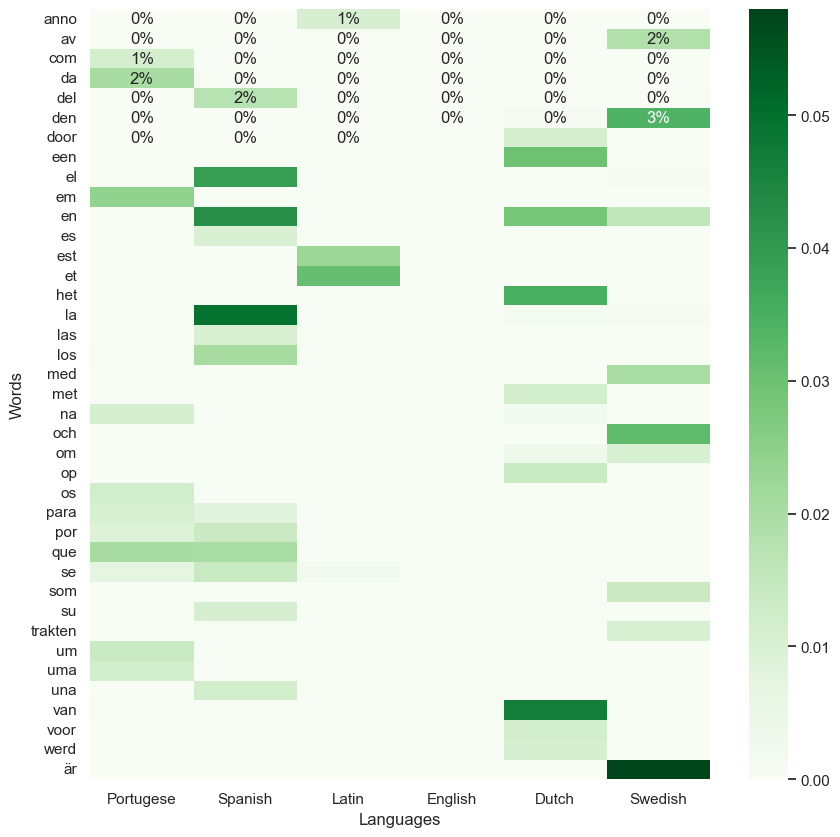

In [9]:
# Định nghĩa một danh sách các ngôn ngữ Châu Âu
europeanLanguages = ['Portugese', 'Spanish', 'Latin', 'English', 'Dutch', 'Swedish']

# Lấy các từ quan trọng cho các ngôn ngữ Châu Âu với mức độ quan trọng là 1%
relevantWords_OnePercent = getrelevantWordsPerLanguage(unigramFeatures, language_dict_unigram, 1e-2)

# Thu thập và sắp xếp các từ quan trọng
europeanWords = []
for lang in europeanLanguages:
    europeanWords += relevantWords_OnePercent[lang]

# Loại bỏ các từ trùng lặp, chuyển đổi thành danh sách và sắp xếp
europeanWords = list(set(europeanWords))
europeanWords.sort()

# Xây dựng dữ liệu cho bản đồ nhiệt
indices = [list(unigramFeatures).index(f) for f in europeanWords]
data = []

# Lặp qua từng ngôn ngữ Châu Âu
for lang in europeanLanguages:
    # Thêm tần suất các từ unigram quan trọng cho ngôn ngữ hiện tại
    data.append(language_dict_unigram[lang][indices])

# Tạo DataFrame cho bản đồ nhiệt
df = pd.DataFrame(np.array(data).T, columns=europeanLanguages, index=europeanWords)
df.index.name = 'Words'
df.columns.name = 'Languages'

# Vẽ bản đồ nhiệt sử dụng seaborn và matplotlib
import seaborn as sn
import matplotlib.pyplot as plt

# Đặt tỷ lệ font chữ cho nhãn
sn.set(font_scale=0.8)

# Đặt kích thước cho hình vẽ bản đồ nhiệt
sn.set(rc={'figure.figsize':(10, 10)})

# Vẽ bản đồ nhiệt sử dụng DataFrame
sn.heatmap(df, cmap="Greens", annot=True, annot_kws={"size": 12}, fmt='.0%')  # Kích thước font chữ cho các chú thích
plt.show()


Thực hiện tách từ theo bi-gram và kiểm tra kết quả sau khi tách

In [10]:
# Nhập CountVectorizer từ module sklearn.feature_extraction.text
from sklearn.feature_extraction.text import CountVectorizer

# Tạo một CountVectorizer cho các bigram (chuỗi hai từ)
# Analyzer được đặt là 'word' để coi mỗi từ như một đặc trưng riêng biệt
# Ngram_range được đặt là (2, 2) để trích xuất các bigram
bigramVectorizer = CountVectorizer(analyzer='word', ngram_range=(2, 2))

# Chuyển đổi dữ liệu huấn luyện thành ma trận tần suất của các bigram
X_bigram_train_raw = bigramVectorizer.fit_transform(X_train)

# Chuyển đổi dữ liệu kiểm tra thành ma trận tần suất của các bigram
X_bigram_test_raw = bigramVectorizer.transform(X_test)

# Lấy tên của các đặc trưng bigram
bigramFeatures = bigramVectorizer.get_feature_names_out()

# In ra số lượng bigram
print('Number of bigrams:', len(bigramFeatures))


Number of bigrams: 329240


Xây dựng từ điển đặc trưng và kiểm tra thử

In [11]:
# Huấn luyện một từ điển ngôn ngữ với số lượng bigram
language_dict_bigram = train_lang_dict(X_bigram_train_raw.toarray(), y_train.values)

# In từ điển ngôn ngữ để kiểm tra
print('language_dict_bigram:', language_dict_bigram)

# Lấy các bigram quan trọng (>1%) cho các ngôn ngữ cụ thể
relevantBigramsPerLanguage = getrelevantWordsPerLanguage(bigramFeatures, language_dict_bigram, significance=1e-2)

# In từ điển các bigram quan trọng để kiểm tra
print('relevantBigramsPerLanguage:', relevantBigramsPerLanguage)

# In ra các bigram quan trọng cho các ngôn ngữ cụ thể
print('Spanish:', relevantBigramsPerLanguage['Spanish'])
print('Italian (Latin):', relevantBigramsPerLanguage['Latin'])
print('English:', relevantBigramsPerLanguage['English'])
print('Dutch:', relevantBigramsPerLanguage['Dutch'])
print('Chinese:', relevantBigramsPerLanguage['Chinese'])
print('Japanese:', relevantBigramsPerLanguage['Japanese'])


language_dict_bigram: {'Urdu': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       4.01767778e-05, 8.03535556e-05, 4.01767778e-05]), 'Persian': array([0., 0., 0., ..., 0., 0., 0.]), 'Russian': array([0., 0., 0., ..., 0., 0., 0.]), 'Hindi': array([0., 0., 0., ..., 0., 0., 0.]), 'Swedish': array([0.        , 0.00040339, 0.        , ..., 0.        , 0.        ,
       0.        ]), 'Arabic': array([3.93468424e-05, 0.00000000e+00, 0.00000000e+00, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00]), 'Japanese': array([0., 0., 0., ..., 0., 0., 0.]), 'Spanish': array([0., 0., 0., ..., 0., 0., 0.]), 'Estonian': array([0.00000000e+00, 0.00000000e+00, 6.81849175e-05, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00]), 'Dutch': array([0., 0., 0., ..., 0., 0., 0.]), 'Turkish': array([0., 0., 0., ..., 0., 0., 0.]), 'Tamil': array([0., 0., 0., ..., 0., 0., 0.]), 'Latin': array([0., 0., 0., ..., 0., 0., 0.]), 'French': array([0., 0., 0., ..., 0., 0., 0.]), 'Korean': 

Thực hiện tách từ theo cùng lúc cả uni-gram và bi-gram; thực hiện trích xuất theo 1% và kiểm tra kết quả

In [12]:
# Nhập CountVectorizer từ module sklearn.feature_extraction.text
from sklearn.feature_extraction.text import CountVectorizer

# Tạo một CountVectorizer cho hỗn hợp các unigram và bigram (1 đến 2 từ)
# Analyzer được đặt là 'word' để coi mỗi từ như một đặc trưng riêng biệt
# Ngram_range được đặt là (1, 2) để trích xuất cả unigram và bigram
# Tham số min_df được đặt là 1e-2 để lọc các đặc trưng xuất hiện trong top 1%
top1PrecentMixtureVectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 2), min_df = 1e-2)

# Chuyển đổi dữ liệu huấn luyện và kiểm tra thành ma trận tần suất của các unigram và bigram
X_top1Percent_train_raw = top1PrecentMixtureVectorizer.fit_transform(X_train)
X_top1Percent_test_raw = top1PrecentMixtureVectorizer.transform(X_test)

# Huấn luyện một từ điển ngôn ngữ với số lượng unigram và bigram
language_dict_top1Percent = train_lang_dict(X_top1Percent_train_raw.toarray(), y_train.values)

# Lấy tên của các đặc trưng trong top 1%
top1PercentFeatures = top1PrecentMixtureVectorizer.get_feature_names_out()

# In ra độ dài của các đặc trưng
print('Length of features:', len(top1PercentFeatures))
print('')

# Các đặc trưng độc nhất cho từng ngôn ngữ
relevantWords_Top1Percent = getrelevantWordsPerLanguage(top1PercentFeatures, language_dict_top1Percent, 1e-5)
for lang in relevantWords_Top1Percent:
    print("{}: {}".format(lang, len(relevantWords_Top1Percent[lang])))


Length of features: 210

Urdu: 42
Persian: 43
Russian: 7
Hindi: 21
Swedish: 37
Arabic: 23
Japanese: 10
Spanish: 37
Estonian: 15
Dutch: 41
Turkish: 34
Tamil: 4
Latin: 30
French: 45
Korean: 5
Pushto: 48
Indonesian: 38
Chinese: 3
Thai: 7
Portugese: 40
Romanian: 39
English: 25


In [13]:
# In ra 100 trích xuất đầu tiên từ danh sách các đặc trưng
for i, feature in enumerate(top1PercentFeatures[:100]):
    print(f'{i+1}: {feature}')


1: aan
2: ad
3: adalah
4: al
5: anno
6: au
7: av
8: avec
9: bir
10: bu
11: care
12: ce
13: com
14: como
15: cu
16: da
17: dalam
18: dan
19: dans
20: dari
21: del
22: delen
23: delen av
24: den
25: dengan
26: des
27: det
28: di
29: die
30: din
31: door
32: dos
33: du
34: då
35: een
36: el
37: em
38: en
39: en el
40: en la
41: entre
42: era
43: es
44: est
45: este
46: et
47: ett
48: finns
49: foi
50: fost
51: het
52: il
53: ile
54: ini
55: için
56: ja
57: juga
58: km
59: la
60: las
61: le
62: les
63: life
64: ligger
65: los
66: mai
67: mais
68: med
69: met
70: meter
71: mm
72: na
73: new
74: ning
75: och
76: olan
77: olarak
78: oleh
79: oli
80: om
81: op
82: os
83: ou
84: pada
85: par
86: para
87: pe
88: pentru
89: plus
90: por
91: pour
92: på
93: que
94: qui
95: sa
96: se
97: sebagai
98: som
99: son
100: su


Xây dựng từ điển đặc trưng và kiểm tra

In [14]:
def getRelevantGramsPerLanguage(features, language_dict, top=50):
    relevantGramsPerLanguage = {}
    for lang in languages:
        grams = []
        relevantGramsPerLanguage[lang] = grams
        v = language_dict[lang]
        
        # Lấy chỉ số của các phần tử đứng đầu 'top' theo thứ tự giảm dần
        sortIndex = (-v).argsort()[:top]
        
        # Thêm các đặc trưng tương ứng vào danh sách
        for i in range(len(sortIndex)):
            grams.append(features[sortIndex[i]])
            
    return relevantGramsPerLanguage

# Lấy top 50 gram cho mỗi ngôn ngữ sử dụng các đặc trưng trong top 1%
top50PerLanguage_dict = getRelevantGramsPerLanguage(top1PercentFeatures, language_dict_top1Percent)

# Thu thập tất cả các gram top 50 duy nhất cho các ngôn ngữ
allTop50 = []
for lang in top50PerLanguage_dict:
    allTop50 += set(top50PerLanguage_dict[lang])

# Loại bỏ các phần tử trùng lặp và lấy các gram top 50 duy nhất
top50 = list(set(allTop50))

# In ra tổng số lượng và số lượng các phần tử duy nhất
print('All items:', len(allTop50))
print('Unique items:', len(top50))


All items: 1100
Unique items: 210


In [15]:
# In ra top 5 trích xuất (n-gram) cho mỗi ngôn ngữ
for lang, grams in top50PerLanguage_dict.items():
    print(f'Top 5 n-grams for {lang}:')
    for i, gram in enumerate(grams[:5]):
        print(f'{i+1}: {gram}')
    print('')  # Thêm dòng trống giữa các ngôn ngữ


Top 5 n-grams for Persian:
1: در
2: به
3: از
4: که
5: این

Top 5 n-grams for Portugese:
1: em
2: da
3: que
4: um
5: os

Top 5 n-grams for Turkish:
1: ve
2: bir
3: olarak
4: bu
5: olan

Top 5 n-grams for Arabic:
1: في
2: من
3: على
4: إلى
5: أن

Top 5 n-grams for Urdu:
1: کے
2: میں
3: ہے
4: کی
5: اور

Top 5 n-grams for Indonesian:
1: dan
2: yang
3: di
4: pada
5: dari

Top 5 n-grams for English:
1: new
2: life
3: os
4: son
5: los

Top 5 n-grams for Japanese:
1: os
2: ce
3: des
4: new
5: su

Top 5 n-grams for Swedish:
1: är
2: den
3: och
4: med
5: av

Top 5 n-grams for French:
1: la
2: le
3: et
4: en
5: les

Top 5 n-grams for Estonian:
1: ja
2: oli
3: ning
4: et
5: new

Top 5 n-grams for Russian:
1: на
2: по
3: года
4: не
5: new

Top 5 n-grams for Latin:
1: et
2: est
3: anno
4: ad
5: die

Top 5 n-grams for Hindi:
1: और
2: एक
3: पर
4: जत
5: यह

Top 5 n-grams for Dutch:
1: van
2: het
3: een
4: en
5: op

Top 5 n-grams for Spanish:
1: la
2: en
3: el
4: los
5: que

Top 5 n-grams for Romanian:
1

In [16]:
# In ra 100 trích xuất đầu tiên từ danh sách các n-gram quan trọng
for i, gram in enumerate(top50[:100]):
    print(f'{i+1}: {gram}')

1: une
2: سال
3: हत
4: qui
5: mais
6: en el
7: ja
8: new
9: که در
10: yang
11: یک
12: untuk
13: juga
14: sunt
15: dans
16: sua
17: دی
18: son
19: fost
20: कर
21: ou
22: sur
23: trakten
24: एक
25: cu
26: en la
27: दवर
28: میں
29: تا
30: इस
31: op
32: foi
33: من
34: voor
35: au
36: از
37: به
38: die
39: بر
40: plus
41: पर
42: är en
43: کا
44: mm
45: uit
46: uma
47: pe
48: آن
49: les
50: не
51: oleh
52: los
53: es
54: نے
55: این
56: در
57: med
58: din
59: له
60: تر
61: su
62: di
63: लए
64: dari
65: dengan
66: دې
67: il
68: pour
69: på
70: na
71: ile
72: est
73: जत
74: ان
75: den
76: que
77: een
78: os
79: el
80: anno
81: څخه
82: على
83: عن
84: olarak
85: um
86: ہے
87: por
88: då
89: em
90: کے
91: إلى
92: en
93: și
94: یہ
95: और
96: یا
97: life
98: het
99: care
100: finns


In [17]:
# Hàm getRelevantColumnIndices
def getRelevantColumnIndices(allFeatures, selectedFeatures):
    relevantColumns = []
    
    # Lặp qua các đặc trưng được chọn
    for feature in selectedFeatures:
        # Tìm các chỉ số nơi mà đặc trưng xuất hiện trong tất cả các đặc trưng
        relevantColumns = np.append(relevantColumns, np.where(allFeatures == feature))
    
    # Chuyển đổi danh sách các chỉ số thành một mảng và ép kiểu thành số nguyên
    return relevantColumns.astype(int)

# Lấy các chỉ số cột liên quan dựa trên các đặc trưng trong top 1% và top 50 gram
relevantColumnIndices = getRelevantColumnIndices(np.array(top1PercentFeatures), top50)

# Trích xuất các cột liên quan từ dữ liệu huấn luyện và kiểm tra
X_top50_train_raw = np.array(X_top1Percent_train_raw.toarray()[:, relevantColumnIndices])
X_top50_test_raw = X_top1Percent_test_raw.toarray()[:, relevantColumnIndices]

# In ra hình dạng của các ma trận kết quả
print('train shape:', X_top50_train_raw.shape)
print('test shape:', X_top50_test_raw.shape)


train shape: (8800, 210)
test shape: (2200, 210)


Tạo sơ đồ và tính toán các thông số sau khi áp dụng mô hình

In [18]:
from sklearn.preprocessing import normalize
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sn
import matplotlib.pyplot as plt
import scipy

# Hàm tiện ích để chuyển đổi các nguồn dữ liệu khác nhau thành mảng NumPy
def toNumpyArray(data):
    data_type = type(data)
    if data_type == np.ndarray:
        return data
    elif data_type == list:
        return np.array(data)
    elif data_type == scipy.sparse.csr.csr_matrix:
        return data.toarray()
    print(data_type)
    return None

# Hàm để chuẩn hóa dữ liệu huấn luyện và kiểm tra bằng chuẩn L2
def normalizeData(train, test):
    # Chuẩn hóa L2 cho dữ liệu huấn luyện và kiểm tra
    train_result = normalize(train, norm='l2', axis=1, copy=True, return_norm=False)
    test_result = normalize(test, norm='l2', axis=1, copy=True, return_norm=False)
    return train_result, test_result

# Hàm áp dụng mô hình Naive Bayes trên dữ liệu
def applyNaiveBayes(X_train, y_train, X_test):
    # Chuyển đổi dữ liệu đầu vào thành mảng NumPy
    trainArray = toNumpyArray(X_train)
    testArray = toNumpyArray(X_test)
    
    # Khởi tạo và huấn luyện mô hình Multinomial Naive Bayes
    clf_mnb = MultinomialNB()
    clf_mnb.fit(trainArray, y_train)
    
    # Dự đoán nhãn cho dữ liệu kiểm tra
    y_predict = clf_mnb.predict(testArray)
    return y_predict

# Hàm tính toán và in ra điểm số F1 ( micro, macro, weighted )
def plot_F_Scores(y_test, y_predict):
    # Tính toán điểm số F1 cho các trung bình micro, macro và weighted
    f1_micro = f1_score(y_test, y_predict, average='micro')
    f1_macro = f1_score(y_test, y_predict, average='macro')
    f1_weighted = f1_score(y_test, y_predict, average='weighted')
    
    # In ra các điểm số F1
    print("F1: {} (micro), {} (macro), {} (weighted)".format(f1_micro, f1_macro, f1_weighted))

# Hàm vẽ ma trận Confusion
def plot_Confusion_Matrix(y_test, y_predict, color="Blues"):
    # Kết hợp các nhãn duy nhất từ nhãn thật và nhãn dự đoán
    allLabels = list(set(list(y_test) + list(y_predict)))
    allLabels.sort()
    
    # Tạo ma trận Confusion
    confusionMatrix = confusion_matrix(y_test, y_predict, labels=allLabels)
    
    # Lấy các nhãn duy nhất trong ma trận Confusion
    uniqueLabel = np.unique(allLabels)
    
    # Tạo DataFrame cho ma trận Confusion
    df_cm = pd.DataFrame(confusionMatrix, columns=uniqueLabel, index=uniqueLabel)
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'

    # Thiết lập seaborn cho trực quan hóa heatmap
    sn.set(font_scale=0.8)  # cho kích thước nhãn
    sn.set(rc={'figure.figsize': (15, 15)})
    
    # Vẽ ma trận Confusion sử dụng heatmap
    sn.heatmap(df_cm, cmap=color, annot=True, annot_kws={"size": 12}, fmt='g')  # cỡ chữ
    plt.show()


Văn bản đầu vào được dùng để kiểm tra code

In [19]:
# Input paragraph
input_text = "Hanoi University of Civil Engineering (HUCE) is where I have found not just education but a profound sense of belonging. Nestled in the heart of Hanoi, HUCE combines tradition with modernity, offering state-of-the-art facilities and a diverse academic environment. The faculty members are not just educators but mentors who guide and inspire. From the majestic campus architecture to the bustling student life, every corner exudes a spirit of learning and innovation. HUCE has equipped me with practical skills and knowledge, preparing me for real-world challenges. I am proud to be part of this esteemed institution that shapes future leaders in civil engineering and beyond."

Naive Bayes

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_8240\1008540280.py:15: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  elif data_type == scipy.sparse.csr.csr_matrix:


F1: 0.8777272727272727 (micro), 0.8576922674705533 (macro), 0.8599570112055371 (weighted)


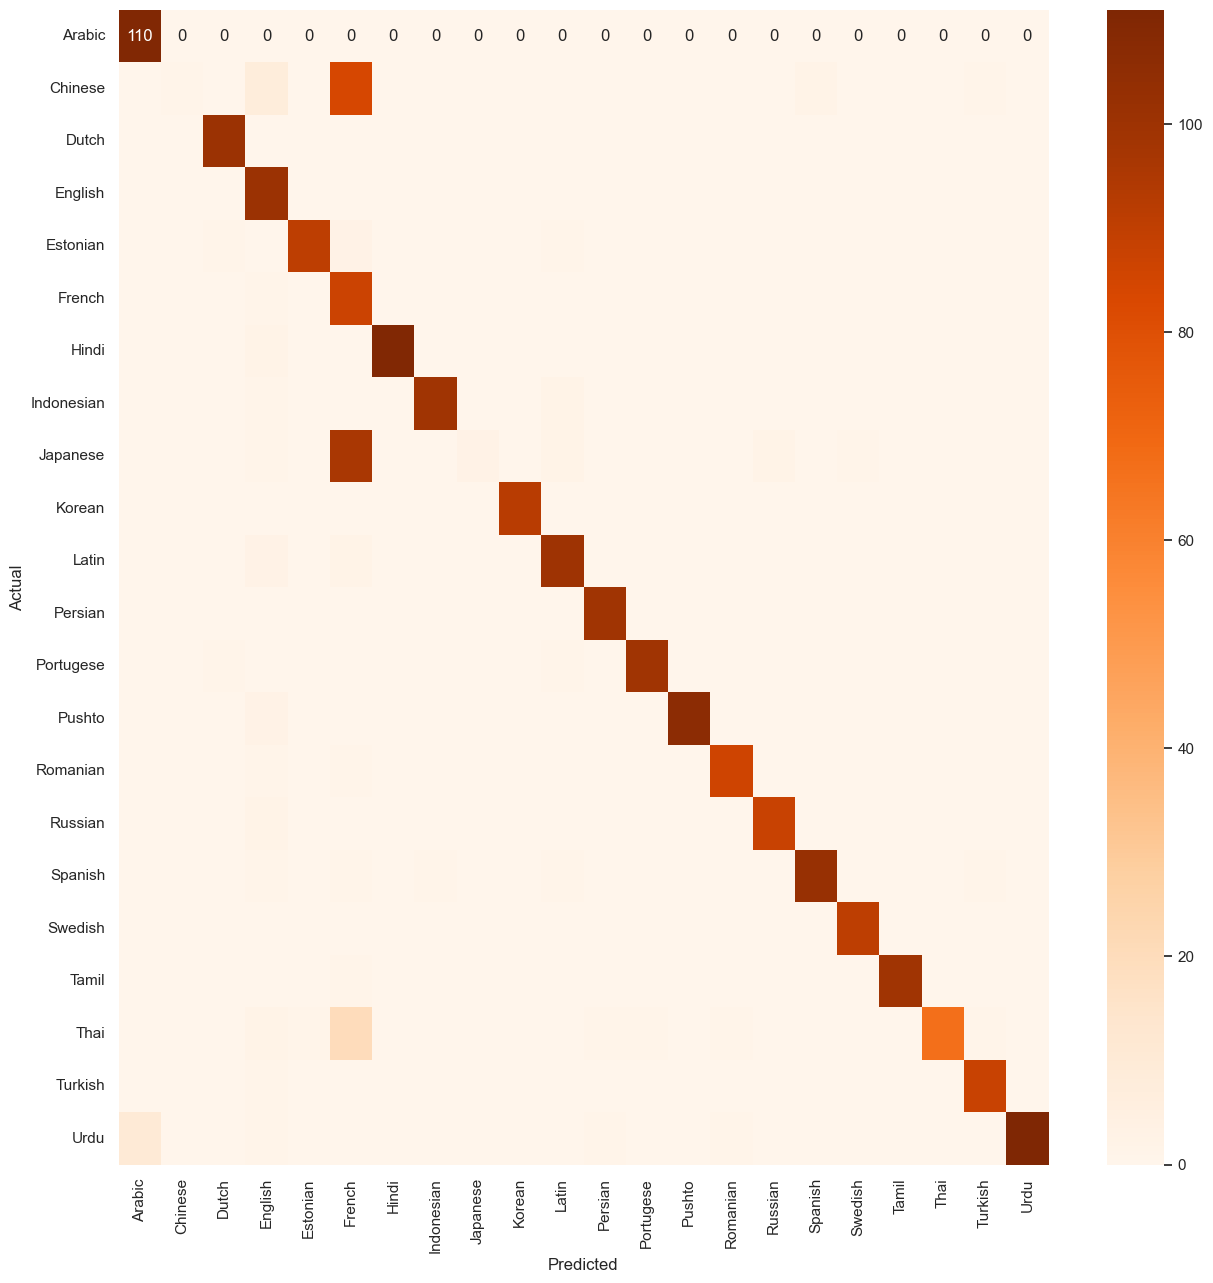

In [20]:
# Chuẩn hóa dữ liệu huấn luyện và kiểm tra cho các đặc trưng unigram
X_unigram_train, X_unigram_test = normalizeData(X_unigram_train_raw, X_unigram_test_raw)

# Áp dụng mô hình Naive Bayes lên các đặc trưng unigram
y_predict_nb_unigram = applyNaiveBayes(X_unigram_train, y_train, X_unigram_test)

# Vẽ các điểm số F1 cho các trung bình micro, macro và weighted
plot_F_Scores(y_test, y_predict_nb_unigram)

# Vẽ ma trận Confusion sử dụng biểu đồ nhiệt
plot_Confusion_Matrix(y_test, y_predict_nb_unigram, "Oranges")


In [21]:
# Khởi tạo và huấn luyện mô hình Multinomial Naive Bayes
clf_mnb = MultinomialNB()
clf_mnb.fit(X_unigram_train, y_train)

# Đọc và xử lý đoạn văn bản đầu vào
cleaned_input = clean_text(input_text)

# Vector hóa dữ liệu đầu vào mới sử dụng unigramVectorizer đã được định nghĩa và huấn luyện
X_new_raw = unigramVectorizer.transform([cleaned_input])

# Chuẩn hóa đoạn văn bản đầu vào đã được vector hóa
X_new_normalized = normalize(X_new_raw, norm='l2', axis=1, copy=True, return_norm=False)

# Sử dụng mô hình Naive Bayes đã huấn luyện (clf_mnb) để dự đoán ngôn ngữ của dữ liệu đầu vào mới
y_new_predict = clf_mnb.predict(X_new_normalized)

# In ra ngôn ngữ dự đoán
print("Predicted languages:", y_new_predict)

Predicted languages: ['English']


C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_8240\1008540280.py:15: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  elif data_type == scipy.sparse.csr.csr_matrix:


F1: 0.7972727272727271 (micro), 0.8019077773383738 (macro), 0.807666749860858 (weighted)


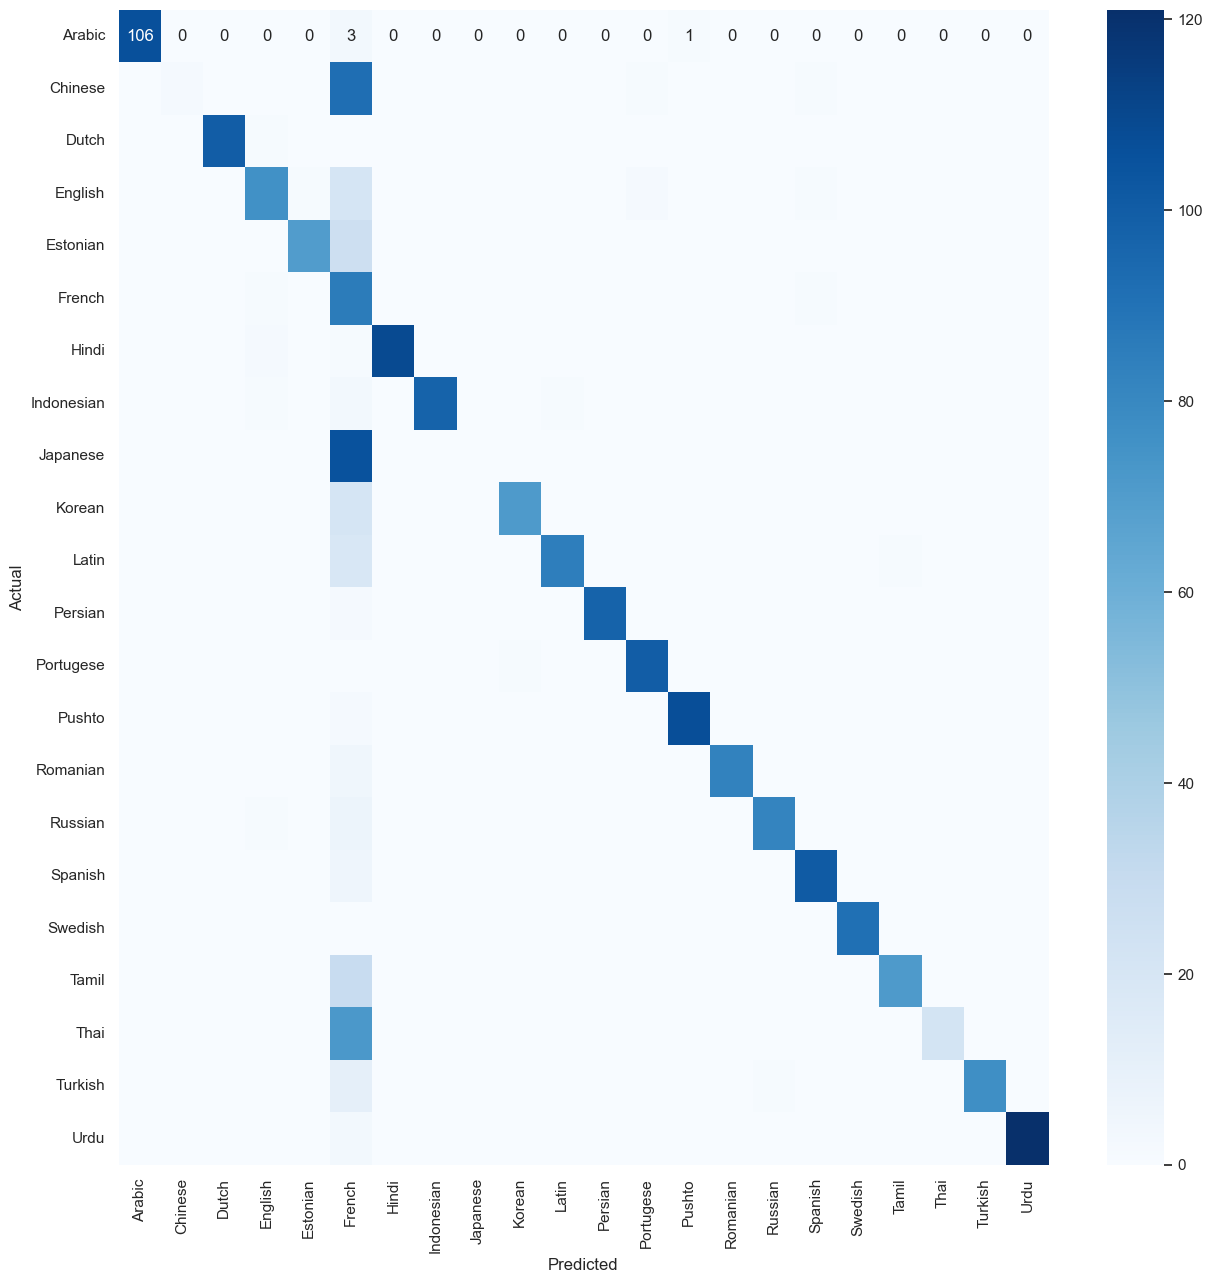

In [22]:
# Chuẩn hóa dữ liệu huấn luyện và kiểm tra bigram
X_bigram_train, X_bigram_test = normalizeData(X_bigram_train_raw, X_bigram_test_raw)

# Áp dụng mô hình Naive Bayes lên các đặc trưng bigram
y_predict_nb_bigram = applyNaiveBayes(X_bigram_train, y_train, X_bigram_test)

# Vẽ các điểm số F1 cho các trung bình micro, macro và weighted
plot_F_Scores(y_test, y_predict_nb_bigram)

# Vẽ ma trận Confusion sử dụng biểu đồ nhiệt
plot_Confusion_Matrix(y_test, y_predict_nb_bigram, "Blues")

In [23]:
# Khởi tạo và huấn luyện mô hình Multinomial Naive Bayes cho bigram
clf_mnb = MultinomialNB()
clf_mnb.fit(X_bigram_train, y_train)

# Đọc và xử lý đoạn văn bản đầu vào
cleaned_input = clean_text(input_text)

# Vector hóa dữ liệu đầu vào mới sử dụng bigramVectorizer đã được định nghĩa và huấn luyện
X_new_raw = bigramVectorizer.transform([cleaned_input])

# Chuẩn hóa đoạn văn bản đầu vào đã được vector hóa
X_new_normalized = normalize(X_new_raw, norm='l2', axis=1, copy=True, return_norm=False)

# Sử dụng mô hình Naive Bayes đã huấn luyện (clf_mnb_bigram) để dự đoán ngôn ngữ của dữ liệu đầu vào mới
y_new_predict = clf_mnb.predict(X_new_normalized)

# In ra ngôn ngữ dự đoán cho bigram
print("Predicted languages for bigrams:", y_new_predict)


Predicted languages for bigrams: ['English']


F1: 0.725909090909091 (micro), 0.7255167360911179 (macro), 0.7325195298056912 (weighted)


C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_8240\1008540280.py:15: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  elif data_type == scipy.sparse.csr.csr_matrix:


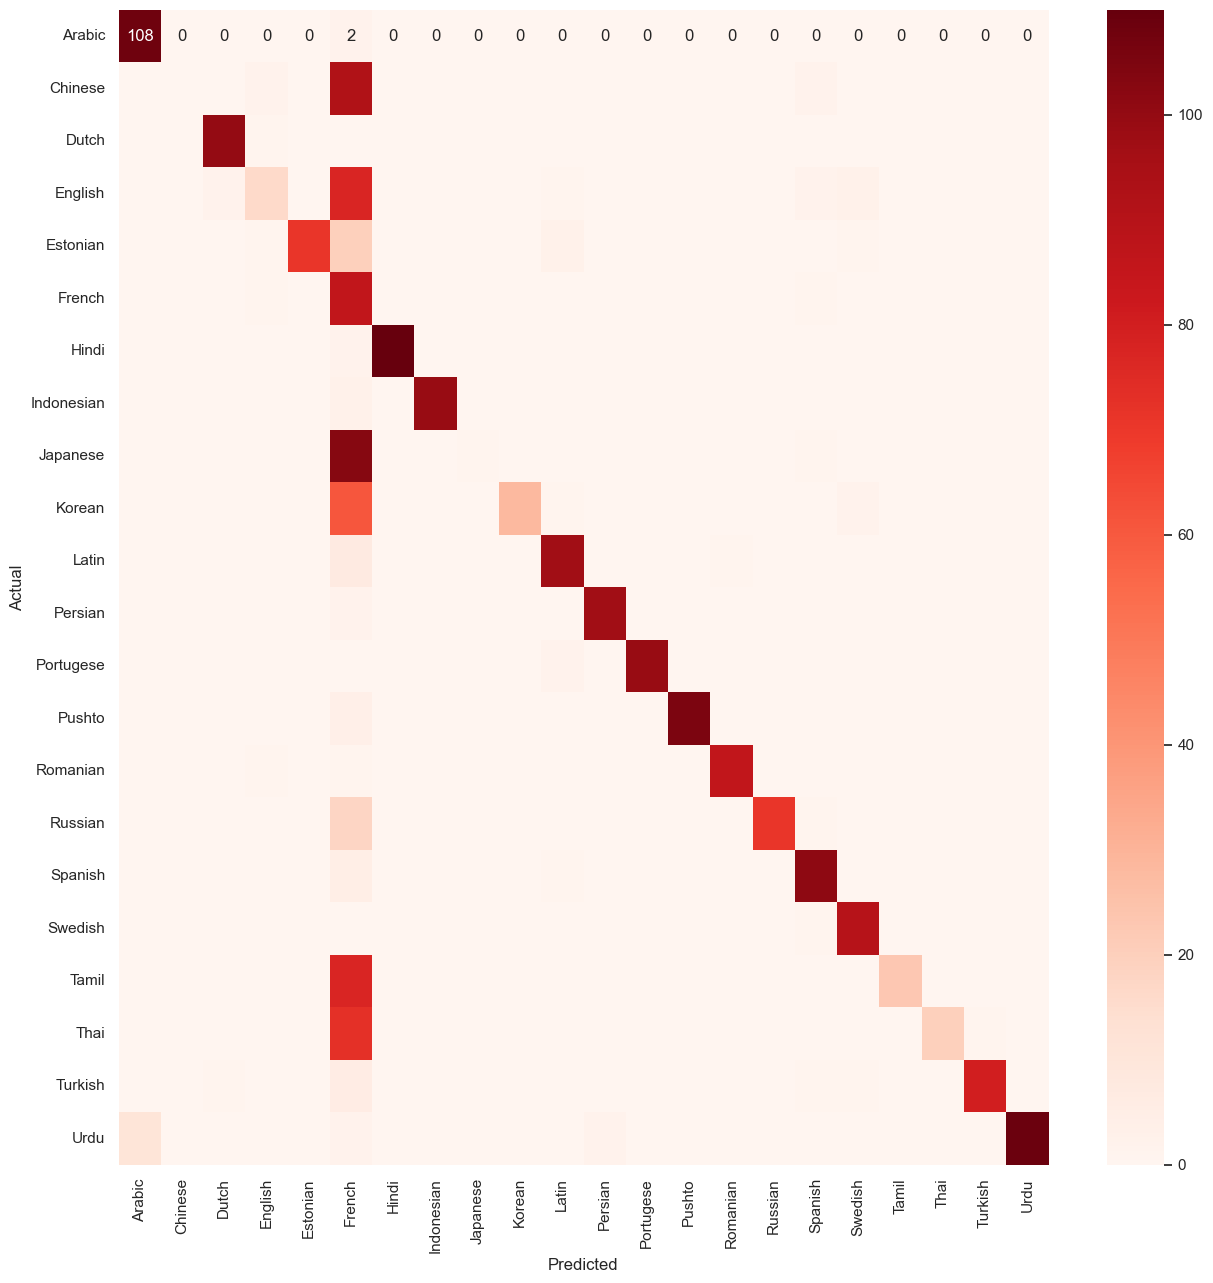

In [24]:
# Chuẩn hóa dữ liệu huấn luyện và kiểm tra top 1%
X_top1Percent_train, X_top1Percent_test = normalizeData(X_top1Percent_train_raw, X_top1Percent_test_raw)

# Áp dụng mô hình Naive Bayes lên các đặc trưng top 1%
y_predict_nb_top1Percent = applyNaiveBayes(X_top1Percent_train, y_train, X_top1Percent_test)

# Vẽ các điểm số F1 cho các trung bình micro, macro và weighted
plot_F_Scores(y_test, y_predict_nb_top1Percent)

# Vẽ ma trận Confusion sử dụng biểu đồ nhiệt
plot_Confusion_Matrix(y_test, y_predict_nb_top1Percent, "Reds")


In [25]:
# Khởi tạo và huấn luyện mô hình Multinomial Naive Bayes
clf_mnb = MultinomialNB()
clf_mnb.fit(X_top1Percent_train, y_train)

# Đọc và xử lý đoạn văn bản đầu vào
cleaned_input = clean_text(input_text)

# Vector hóa dữ liệu đầu vào mới sử dụng top1PrecentMixtureVectorizer đã được định nghĩa và huấn luyện
X_new_raw = top1PrecentMixtureVectorizer.transform([cleaned_input])

# Chuẩn hóa đoạn văn bản đầu vào đã được vector hóa
X_new_normalized = normalize(X_new_raw, norm='l2', axis=1, copy=True, return_norm=False)

# Sử dụng mô hình Naive Bayes đã huấn luyện (clf_mnb) để dự đoán ngôn ngữ của dữ liệu đầu vào mới
y_new_predict = clf_mnb.predict(X_new_normalized)

# In ra ngôn ngữ dự đoán
print("Predicted languages:", y_new_predict)

Predicted languages: ['English']


F1: 0.725909090909091 (micro), 0.7255167360911179 (macro), 0.7325195298056912 (weighted)


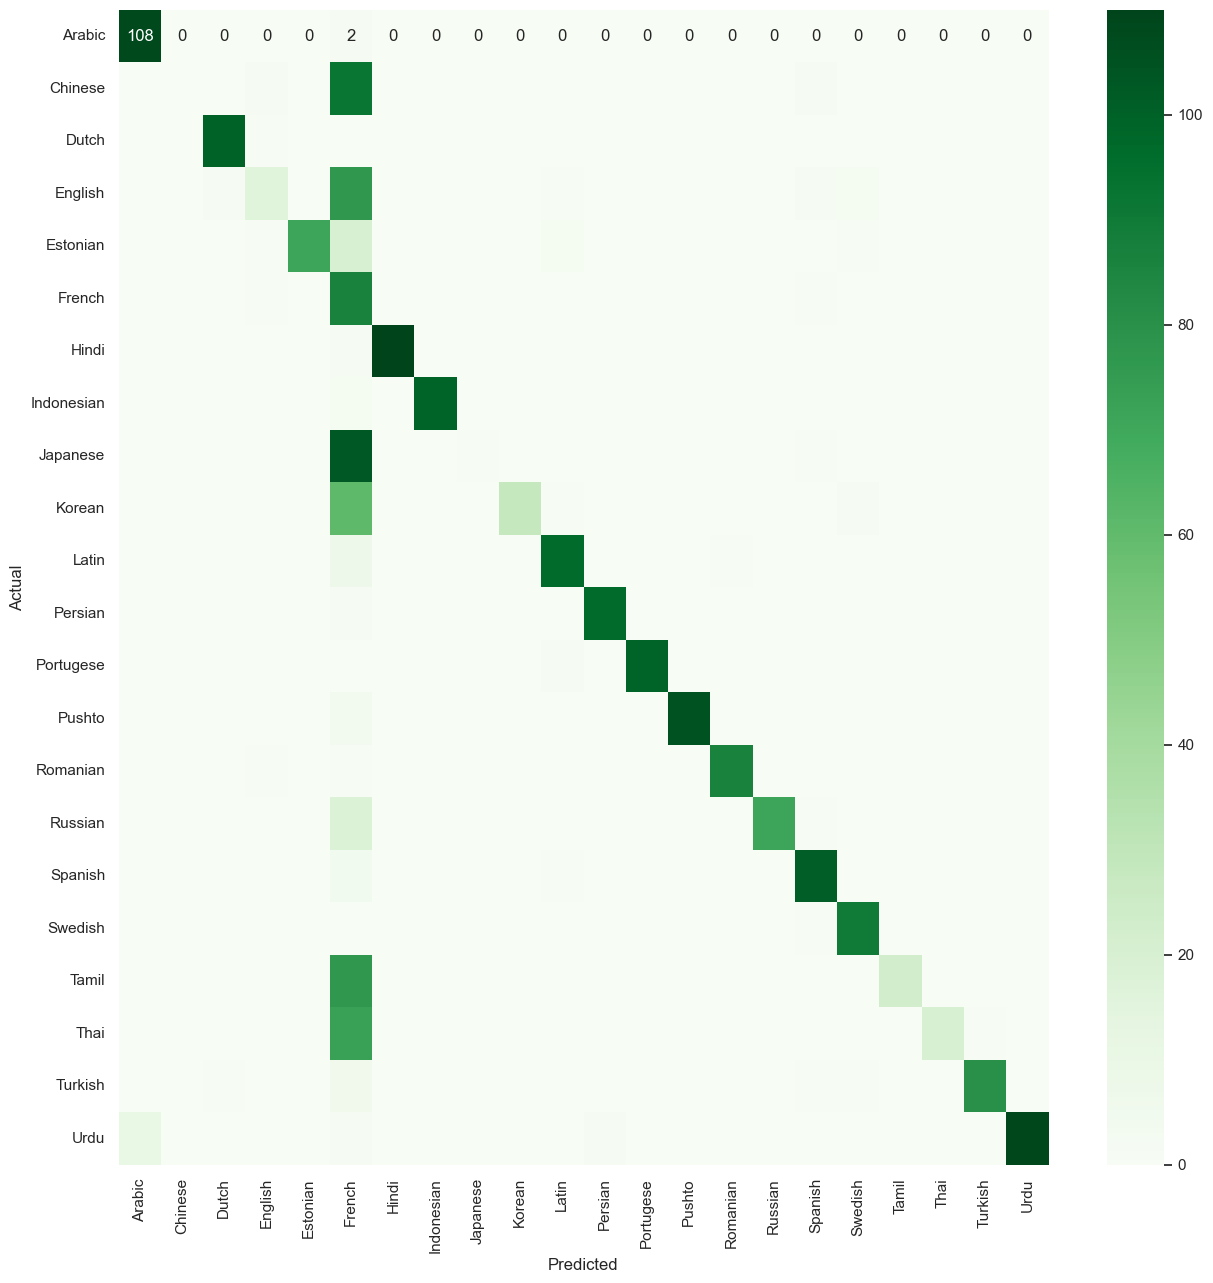

In [26]:
# Chuẩn hóa dữ liệu huấn luyện và kiểm tra top 50
X_top50_train, X_top50_test = normalizeData(X_top50_train_raw, X_top50_test_raw)

# Áp dụng mô hình Naive Bayes lên các đặc trưng top 50
y_predict_nb_top50 = applyNaiveBayes(X_top50_train, y_train, X_top50_test)

# Vẽ các điểm số F1 cho các trung bình micro, macro và weighted
plot_F_Scores(y_test, y_predict_nb_top50)

# Vẽ ma trận Confusion sử dụng biểu đồ nhiệt
plot_Confusion_Matrix(y_test, y_predict_nb_top50, "Greens")


In [27]:
# Xử lý và vector hóa đoạn văn bản đầu vào
cleaned_input = clean_text(input_text)
X_input_vectorized = top1PrecentMixtureVectorizer.transform([cleaned_input])

# Chọn các đặc trưng top 50 từ đoạn văn bản đầu vào đã vector hóa
X_input_top50 = X_input_vectorized[:, relevantColumnIndices]

# Chuẩn hóa dữ liệu đầu vào
X_input_top50_normalized = normalize(X_input_top50, norm='l2', axis=1)

# Dự đoán ngôn ngữ của đoạn văn bản đầu vào sử dụng mô hình k-NN đã huấn luyện trên các đặc trưng top 50
clf_mnb_top50 = MultinomialNB()
clf_mnb_top50.fit(X_top50_train, y_train)  # X_top50_train là dữ liệu huấn luyện với các đặc trưng top 50
predicted_language_top50 = clf_mnb_top50.predict(X_input_top50_normalized)

print("Predicted Language (Top 50 Features):", predicted_language_top50)

Predicted Language (Top 50 Features): ['English']


K Nearest Neighbor

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_8240\1008540280.py:15: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  elif data_type == scipy.sparse.csr.csr_matrix:


F1: 0.8627272727272727 (micro), 0.8479324036187432 (macro), 0.8479946067213152 (weighted)


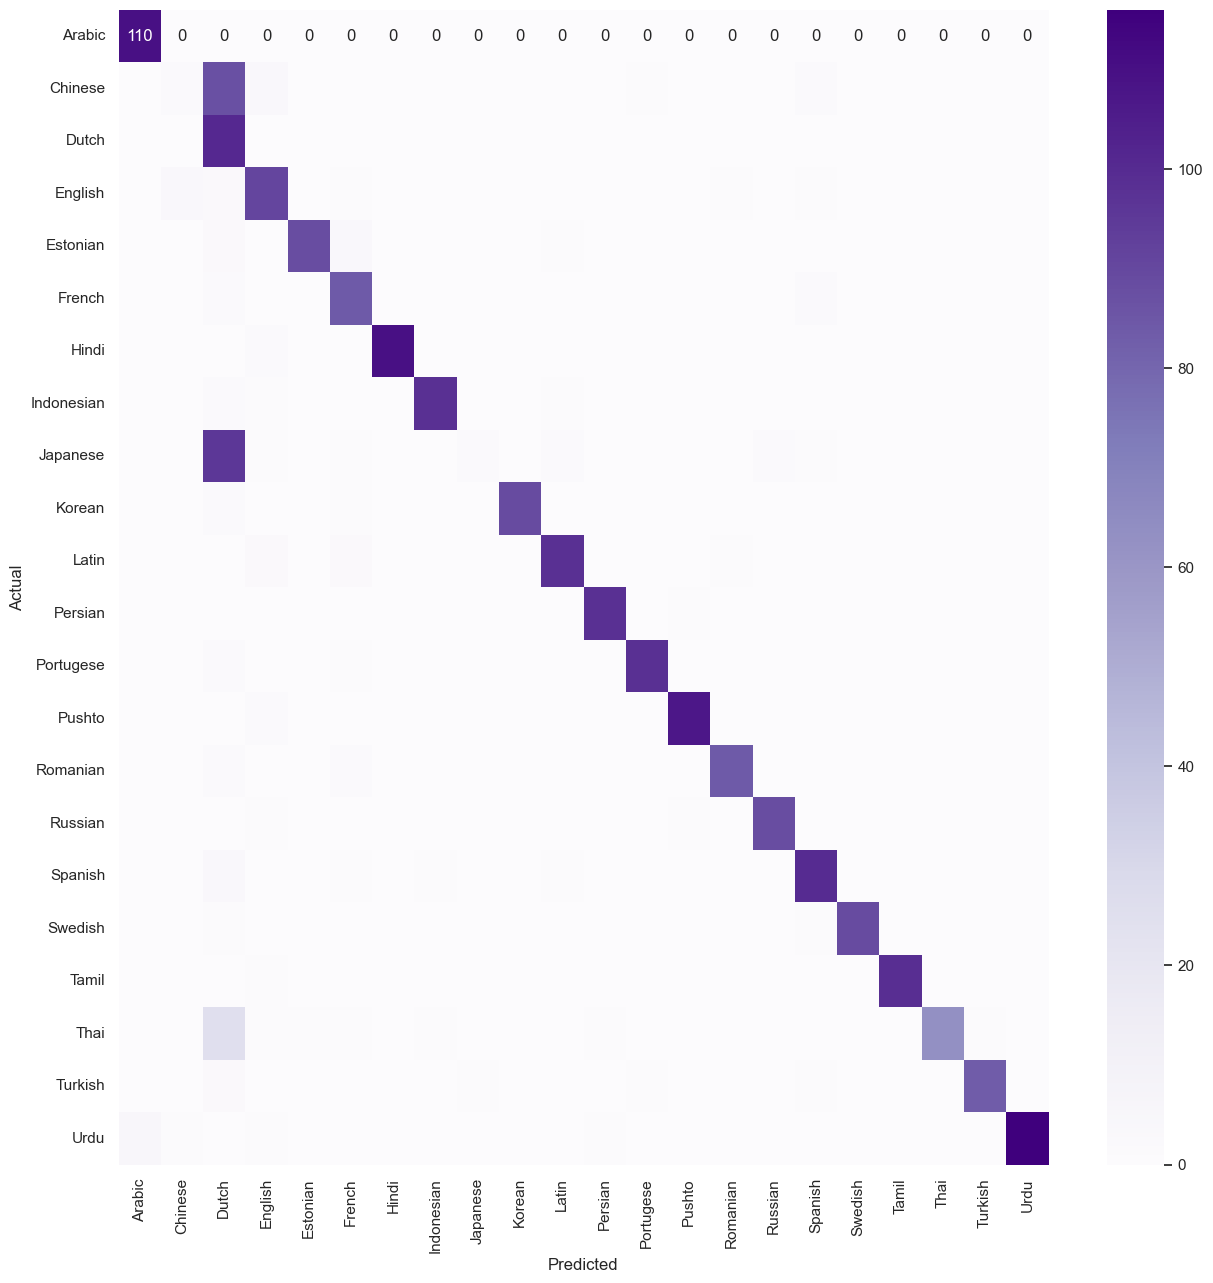

F1: 0.7645454545454545 (micro), 0.7670691467575768 (macro), 0.7709526249167509 (weighted)


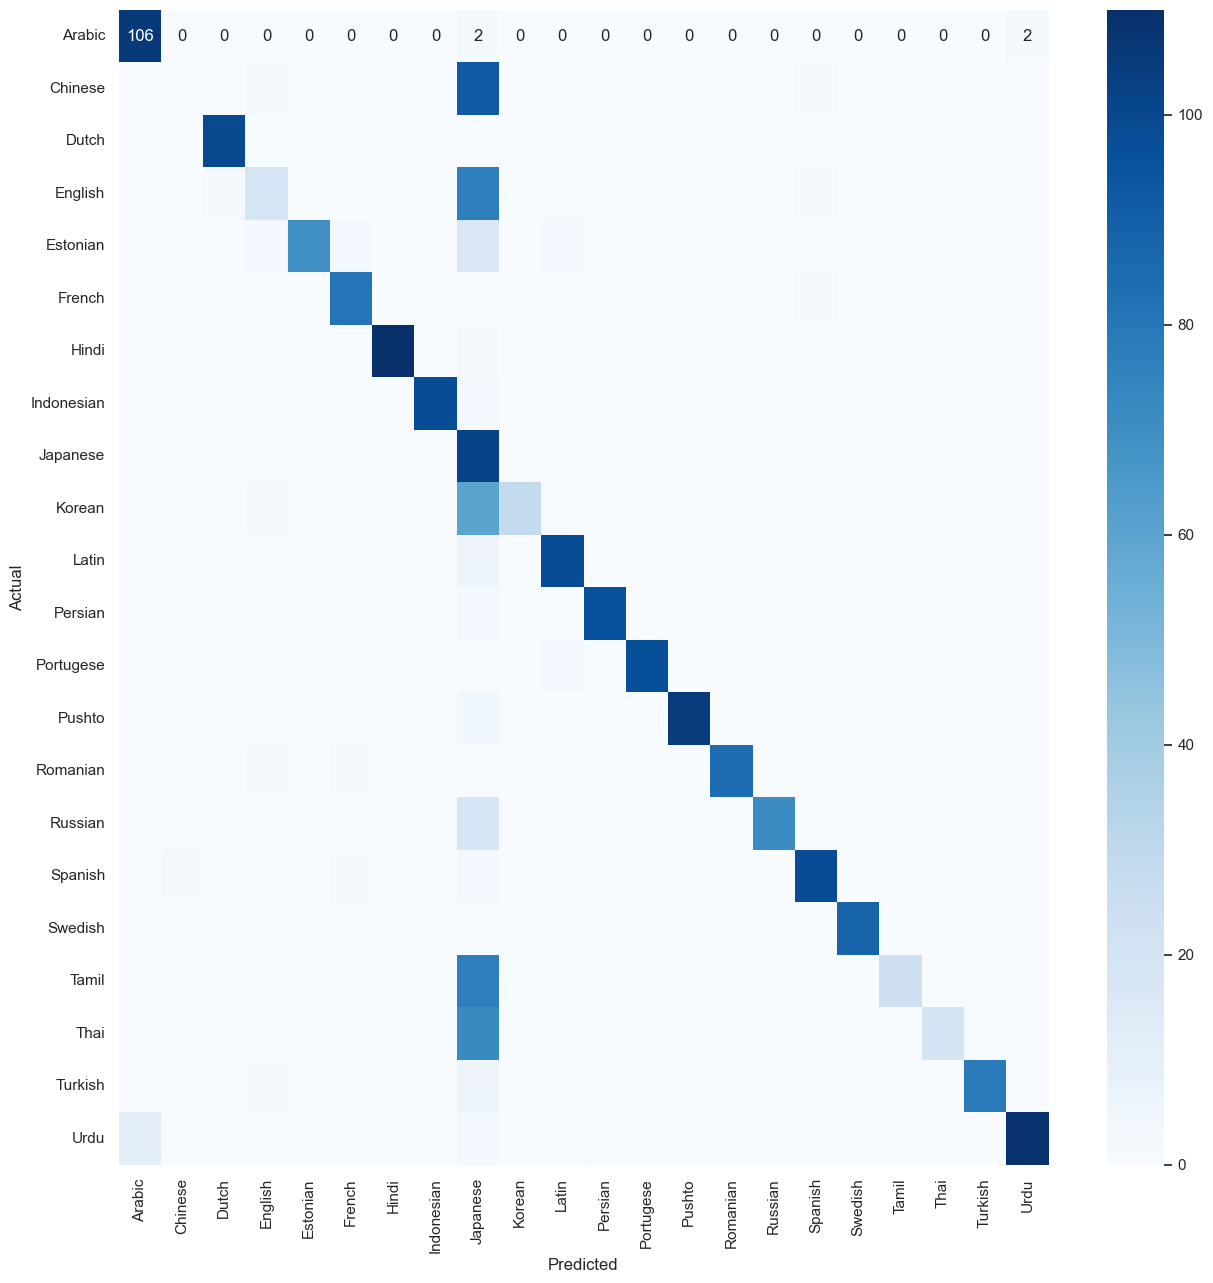

In [28]:
from sklearn.neighbors import KNeighborsClassifier

def applyNearestNeighbour(X_train, y_train, X_test):
    # Chuyển đổi dữ liệu đầu vào thành mảng NumPy
    trainArray = toNumpyArray(X_train)
    testArray = toNumpyArray(X_test)
    
    # Khởi tạo và huấn luyện mô hình k-Nearest Neighbors
    clf_knn = KNeighborsClassifier()
    clf_knn.fit(trainArray, y_train)
    
    # Dự đoán nhãn cho dữ liệu kiểm tra
    y_predict = clf_knn.predict(testArray)
    return y_predict

# Áp dụng k-NN trên các đặc trưng Unigram
y_predict_knn_unigram = applyNearestNeighbour(X_unigram_train, y_train, X_unigram_test)
plot_F_Scores(y_test, y_predict_knn_unigram)
plot_Confusion_Matrix(y_test, y_predict_knn_unigram, "Purples")

# Áp dụng k-NN trên các đặc trưng Top 50
y_predict_knn_top50 = applyNearestNeighbour(X_top50_train, y_train, X_top50_test)
plot_F_Scores(y_test, y_predict_knn_top50)
plot_Confusion_Matrix(y_test, y_predict_knn_top50, "Blues")


In [29]:
# Xử lý và vector hóa đoạn văn bản đầu vào
cleaned_input = clean_text(input_text)
X_input_vectorized = unigramVectorizer.transform([cleaned_input])

# Chuẩn hóa dữ liệu đầu vào
X_input_normalized = normalize(X_input_vectorized, norm='l2', axis=1)

# Khởi tạo và huấn luyện mô hình k-Nearest Neighbors cho unigram
clf_knn_unigram = KNeighborsClassifier()
clf_knn_unigram.fit(X_unigram_train, y_train)

# Dự đoán ngôn ngữ của đoạn văn bản đầu vào sử dụng mô hình k-Nearest Neighbors đã huấn luyện
predicted_language_unigram = clf_knn_unigram.predict(X_input_normalized)

print("Predicted Language (Unigram):", predicted_language_unigram[0])


Predicted Language (Unigram): English


In [30]:
# Xử lý và vector hóa đoạn văn bản đầu vào
cleaned_input = clean_text(input_text)
X_input_vectorized = top1PrecentMixtureVectorizer.transform([cleaned_input])

# Chọn các đặc trưng top 50 từ đoạn văn bản đầu vào đã vector hóa
X_input_top50 = X_input_vectorized[:, relevantColumnIndices]

# Chuẩn hóa dữ liệu đầu vào
X_input_top50_normalized = normalize(X_input_top50, norm='l2', axis=1)

# Khởi tạo và huấn luyện mô hình k-Nearest Neighbors cho top 50
clf_knn_top50 = KNeighborsClassifier()
clf_knn_top50.fit(X_top50_train, y_train)

# Dự đoán ngôn ngữ của đoạn văn bản đầu vào sử dụng mô hình k-Nearest Neighbors đã huấn luyện
predicted_language_top50 = clf_knn_top50.predict(X_input_top50_normalized)

print("Predicted Language (Top 50 Features):", predicted_language_top50[0])


Predicted Language (Top 50 Features): English


OLS

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_8240\2615523427.py:26: RuntimeWarning: invalid value encountered in divide
  return X_test / np.sum(X_test, axis=1).reshape(-1, 1)


F1: 0.7095454545454546 (micro), 0.7106376672425513 (macro), 0.7074731054517098 (weighted)


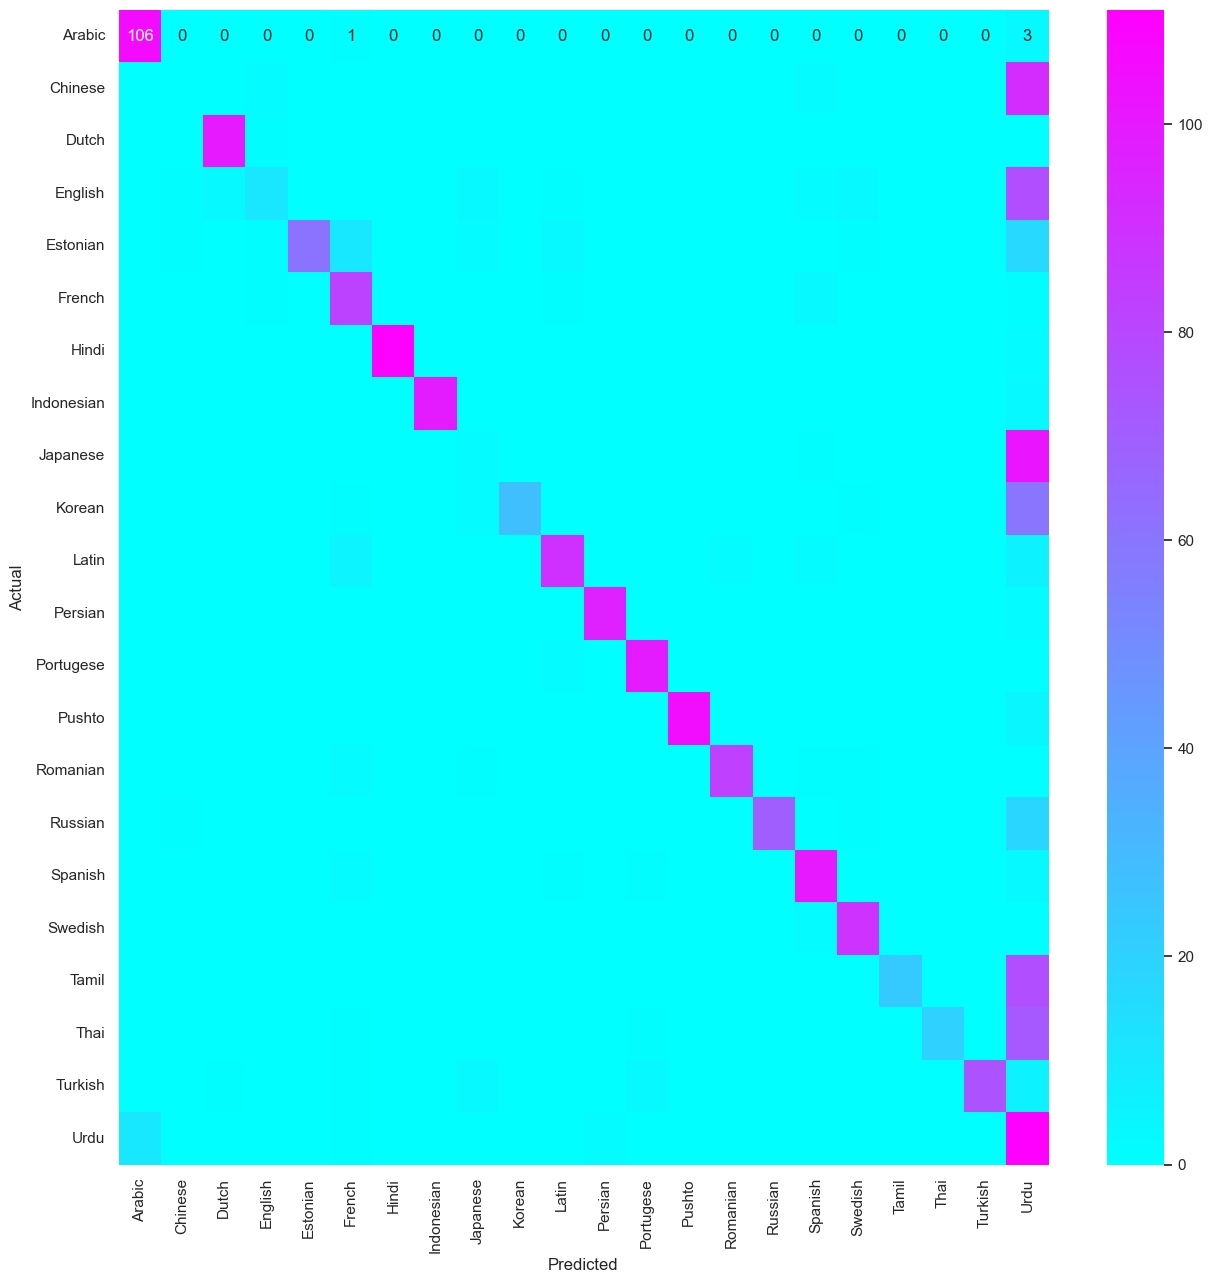

In [31]:
import numpy as np
from scipy.sparse import csr_matrix

# Hàm huấn luyện từ điển ngôn ngữ
def train_lang_dict(X_raw_counts, y_train):
    lang_dict = {}
    for i in range(len(y_train)):
        lang = y_train[i]
        v = np.array(X_raw_counts[i])
        if lang not in lang_dict:
            lang_dict[lang] = v
        else:
            lang_dict[lang] += v

    # Chuyển đổi số lượng thành tần suất tương đối
    for lang in lang_dict:
        v = lang_dict[lang]
        lang_dict[lang] = v / np.sum(v)

    return lang_dict

# Hàm chuyển đổi số lượng thành tần suất tương đối
def toRelative(X_test):
    if isinstance(X_test, csr_matrix):
        X_test = X_test.toarray()
    return X_test / np.sum(X_test, axis=1).reshape(-1, 1)

# Áp dụng train_lang_dict cho dữ liệu huấn luyện top 50 và lấy từ điển ngôn ngữ
language_dict_top50 = train_lang_dict(X_top50_train, y_train.values)

# Chuyển đổi số lượng thành tần suất tương đối cho dữ liệu kiểm tra top 50
X_top50_test_rel = toRelative(X_top50_test)

def ols_predict(language_dict, X_test):
    def calcSquareDifference(p, q):
        return np.sum((p - q) ** 2)

    def ols(language_dict, v, langs):
        olsVector = np.array([calcSquareDifference(language_dict.get(l, np.zeros_like(v)), v) for l in langs])
        index = np.argmin(olsVector)
        return langs[index]

    langs = [l for l in language_dict]
    return [ols(language_dict, v, langs) for v in X_test]

# Áp dụng dự đoán bằng OLS để có được dự đoán ngôn ngữ cho dữ liệu kiểm tra top 50
ols_predictions = ols_predict(language_dict_top50, X_top50_test_rel)

# Vẽ các điểm số F1 cho các trung bình micro, macro và weighted
plot_F_Scores(y_test, ols_predictions)

# Vẽ ma trận Confusion sử dụng biểu đồ nhiệt
plot_Confusion_Matrix(y_test, ols_predictions, 'cool')


In [32]:
# Dự đoán ngôn ngữ của đoạn văn bản đầu vào sử dụng OLS
# Xử lý và vector hóa đoạn văn bản đầu vào
cleaned_input = clean_text(input_text)
X_input_vectorized = top1PrecentMixtureVectorizer.transform([cleaned_input])

# Chọn các đặc trưng top 50 từ đoạn văn bản đầu vào đã vector hóa
X_input_top50 = X_input_vectorized[:, relevantColumnIndices]

# Chuyển đổi số lượng thành tần suất tương đối cho dữ liệu đầu vào
X_input_top50_rel = toRelative(X_input_top50)

# Hàm dự đoán ngôn ngữ sử dụng OLS cho đoạn văn bản đầu vào
def ols_predict_single(language_dict, X_input):
    def calcSquareDifference(p, q):
        return np.sum((p - q) ** 2)

    def ols(language_dict, v, langs):
        olsVector = np.array([calcSquareDifference(language_dict.get(l, np.zeros_like(v)), v) for l in langs])
        index = np.argmin(olsVector)
        return langs[index]

    langs = [l for l in language_dict]
    return ols(language_dict, X_input, langs)

# Dự đoán ngôn ngữ cho đoạn văn bản đầu vào sử dụng OLS
predicted_language_ols = ols_predict_single(language_dict_top50, X_input_top50_rel[0])

print("Predicted Language (OLS, Top 50 Features):", predicted_language_ols)


Predicted Language (OLS, Top 50 Features): Swedish


KS

None-Predictions: 1924
F1: 0.12318181818181818 (micro), 0.1947490909337607 (macro), 0.20430898170679854 (weighted)


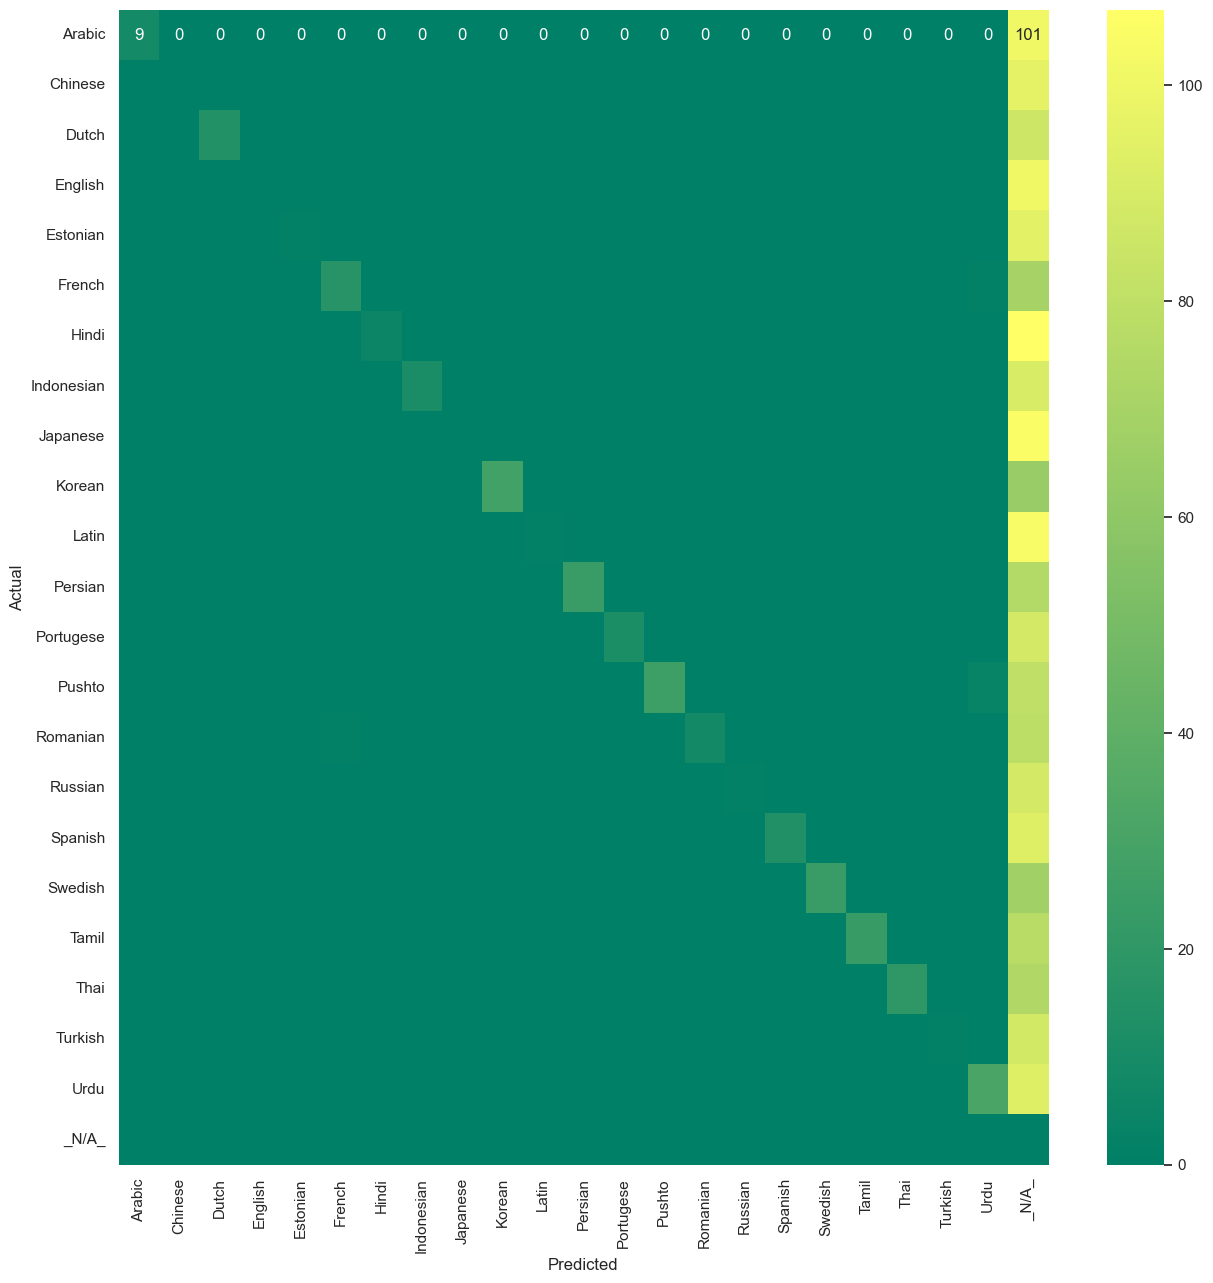

In [33]:
def ks_predict(language_dict, X_test, n, c_alpha=1.628):
    def calcMaxAbsDifference(p, q):
        return np.max(np.abs(p - q))
    
    def scaleAlpha(n, m, c_alpha):
        factor = ((n + m) / n / m) ** 0.5
        return factor * c_alpha
    
    def ks(language_dict, v, langs):
        ksVector = np.array([calcMaxAbsDifference(language_dict.get(l, np.zeros_like(v)), v) for l in langs])
        index = np.argmin(ksVector)
        m = len(v)
        scaledAlpha = scaleAlpha(n, m, c_alpha)
        if ksVector[index] <= scaledAlpha:
            return langs[index]
        else:
            return '_N/A_'
    
    langs = [l for l in language_dict]
    return [ks(language_dict, v, langs) for v in X_test]

# Áp dụng dự đoán bằng phương pháp KS trên các đặc trưng top 50
ks_predictions = ks_predict(language_dict_top50, X_top50_test_rel, 356 * 800)

# In ra số lượng dự đoán không xác định
print('None-Predictions:', (np.array(ks_predictions) == '_N/A_').sum())

# Vẽ các điểm số F1 cho các trung bình micro, macro và weighted
plot_F_Scores(y_test, ks_predictions)

# Vẽ ma trận Confusion sử dụng biểu đồ nhiệt
plot_Confusion_Matrix(y_test, ks_predictions, 'summer')


In [34]:
# Giả định một giá trị giữ chỗ cho 'n', tổng số
n = 356 * 800  # Điều này sẽ được thay thế bằng tổng số thực tế từ tập dữ liệu của bạn

# Xử lý đoạn văn bản đầu vào
cleaned_input = clean_text(input_text)

# Vector hóa đoạn văn bản đầu vào sử dụng vectorizer đã sử dụng cho các đặc trưng Top 50
X_input_vectorized = top1PrecentMixtureVectorizer.transform([cleaned_input])

# Chọn các đặc trưng Top 50 từ đoạn văn bản đầu vào đã vector hóa
X_input_top50 = X_input_vectorized.toarray()[:, relevantColumnIndices]

# Chuyển đổi số lượng thành tần suất tương đối cho đoạn văn bản đầu vào
X_input_top50_rel = [v / np.sum(v) if np.sum(v) > 0 else [0]*len(v) for v in X_input_top50]

# Kiểm tra xem X_input_top50_rel không trống và không chứa lỗi chia cho 0
if len(X_input_top50_rel) == 0 or np.isnan(X_input_top50_rel).any():
    raise ValueError("The input paragraph does not contain any of the Top 50 features or has a division by zero.")

# Áp dụng dự đoán bằng phương pháp KS cho tần suất tương đối của các đặc trưng Top 50 của đoạn văn bản đầu vào
ks_prediction_input = ks_predict(language_dict_top50, X_input_top50_rel, n)

# In ra ngôn ngữ dự đoán cho đoạn văn bản đầu vào
print("Predicted Language for Input Paragraph (Top 50 Features):", ks_prediction_input)


Predicted Language for Input Paragraph (Top 50 Features): ['_N/A_']


Langdetect

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
F1: 0.8186363636363636 (micro), 0.6111412736492727 (macro), 0.8016472007892191 (weighted)


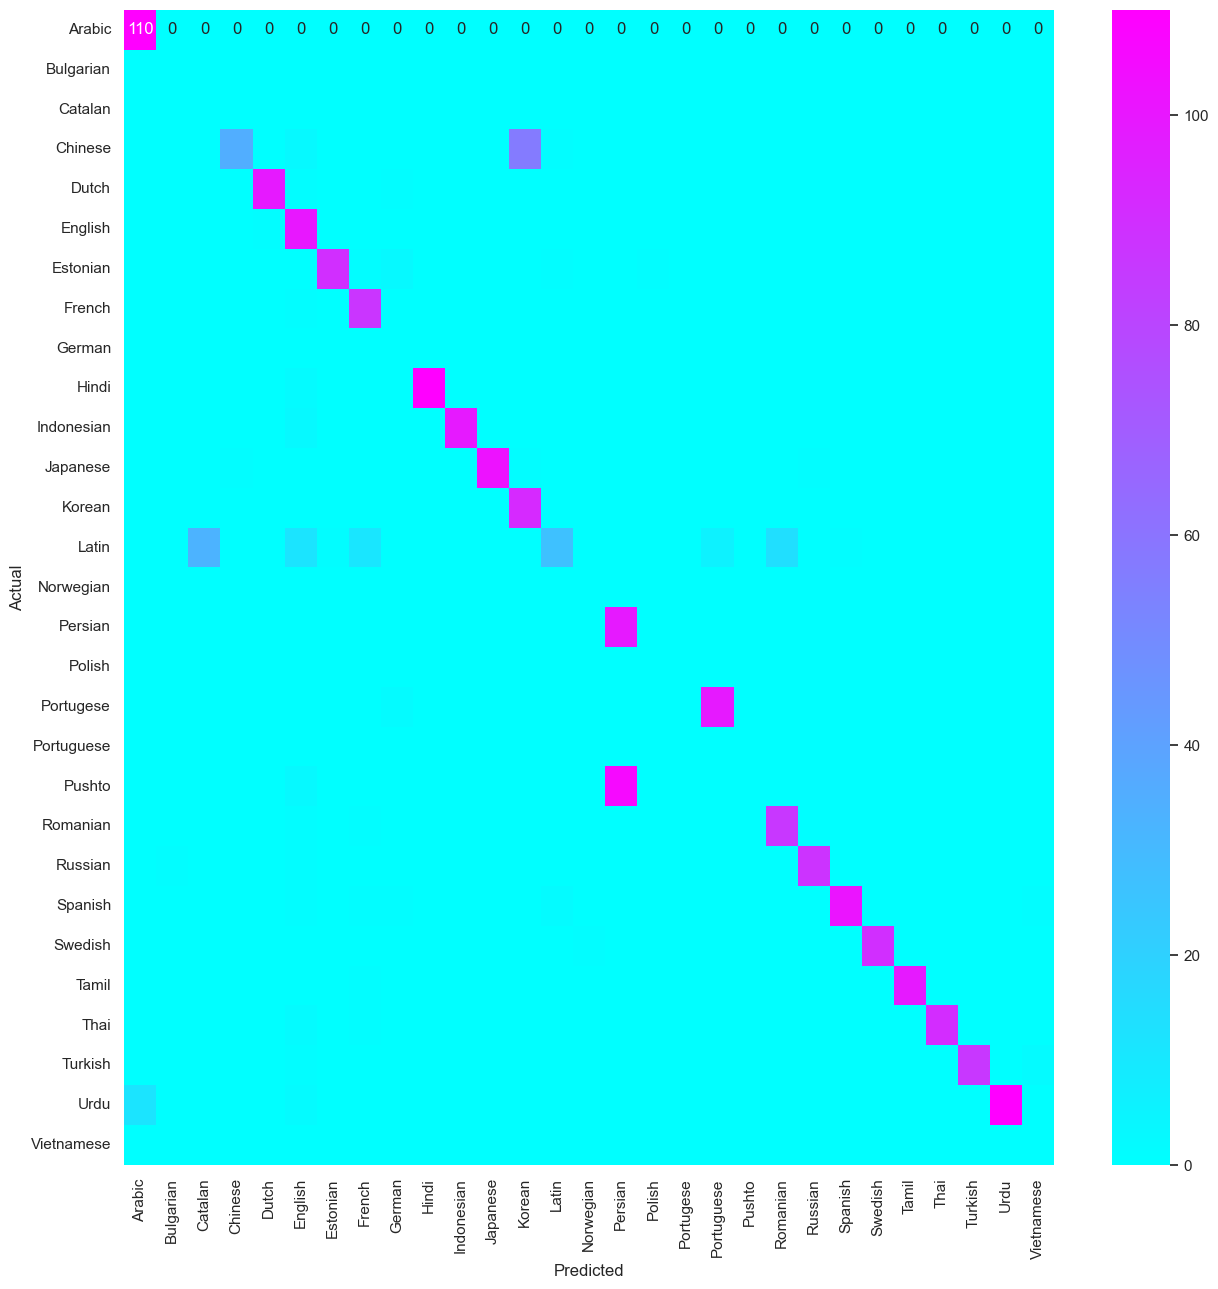

In [35]:
!pip install langdetect
!pip install iso-639

from langdetect import detect
from iso639 import languages

# Hàm để kiểm chứng ngôn ngữ đã phát hiện
def proofLanguage(text):
    # Lấy mã ngôn ngữ gồm hai chữ cái sử dụng langdetect
    twoLetterCode = detect(text)[:2]  # Gộp lại các ngôn ngữ 2 tiếng

    # Xử lý các trường hợp đặc biệt
    if twoLetterCode == 'it':  # Italian -> Latin
        return 'Latin'
    elif twoLetterCode == 'pt':  # Portuguese -> Portugese
        return 'Portuguese'
    else:
         # Sử dụng thư viện iso639 để lấy tên ngôn ngữ tiếng Anh dựa trên mã hai chữ cái
        lang = languages.get(alpha2=twoLetterCode)
        langName = lang.name

        # Nếu không có tên tiếng Anh, trả về mã hai chữ cá
        if langName is not None:
            return langName
        return twoLetterCode

# Áp dụng hàm proofLanguage để có được nhãn ngôn ngữ thực tế cho X_test
y_test_proof = [proofLanguage(t) for t in X_test]

plot_F_Scores(y_test, y_test_proof)
plot_Confusion_Matrix(y_test, y_test_proof, 'cool')

In [36]:
# Nhập hàm detect từ langdetect
from langdetect import detect
from iso639 import languages

# Định nghĩa hàm để lấy tên ngôn ngữ đầy đủ từ mã ISO 639-1 gồm hai chữ cái
def get_language_name(two_letter_code):
    try:
        lang = languages.get(part1=two_letter_code)
        return lang.name
    except KeyError:
        return two_letter_code  # Trả về mã ngôn ngữ nếu không tìm thấy tên ngôn ngữ

# Hàm để phát hiện ngôn ngữ của một đoạn văn bản
def detect_language(text):
    two_letter_code = detect(text)
    return get_language_name(two_letter_code)

# Sử dụng hàm detect_language để xác định ngôn ngữ của input_paragraph
predicted_language = detect_language(input_text)

# In ra ngôn ngữ dự đoán
print("Predicted Language:", predicted_language)

Predicted Language: English


Kiểm tra các trường hợp đúng và sai của dự đoán

In [37]:
def plotTopErrors(y_predict, top=5):
    # Lấy nhãn thực tế và dữ liệu văn bản
    ys = y_test.values
    Xs = X_test.values
    
   # Bộ đếm để theo dõi số lượng lỗi
    errorCount = 0
    
    # Lặp qua các dự đoán và nhãn thực tế
    for i in range(len(ys)):
        # Kiểm tra nếu nhãn dự đoán khác với nhãn thực tế
        if not ys[i] == y_predict[i]:
            errorCount += 1
            
            # In thông tin về lỗi
            print("#{}: Expected: {}, Predicted: {}".format(errorCount, ys[i], y_predict[i]))
            print("Text:", Xs[i])
            print("=================================================")
            
        # Dừng vòng lặp nếu đạt đến số lượng lỗi cần hiển thị
        if errorCount >= top:
            break


In [38]:
# Giả sử y_predict_nb_top50 chứa các nhãn dự đoán cho X_top50_test
plotTopErrors(y_predict_nb_top50, top=5)
# Giả sử y_predict_nb_unigram chứa các nhãn dự đoán cho X_unigram_test
plotTopErrors(y_predict_nb_unigram, top=5)
# Giả sử ks_predictions chứa các nhãn dự đoán cho X_top50_test_rel
plotTopErrors(ks_predictions, top=5)

#1: Expected: Japanese, Predicted: French
Text: 藤女の女性教師歳数学担当風紀指導を担当しておりリコにとっては天敵藤女とその伝統に強い誇りを抱いておりサヨの彼氏バレの際には厳しい態度を取るその一方で体育祭の時に天ヶ崎が仕込んだ悪ふざけを承知の上で見逃したり生徒会執行部が何事か画策しているのを悟りながらある一線を越えない限り黙認するなど単なる堅物ではない一面ものぞかせる体育祭の応援合戦でマキマキオから白いバラを受け取った際には顔を真っ赤にしていた
#2: Expected: Japanese, Predicted: French
Text: 年には糸井重里が主催するほぼ日刊イトイ新聞と土楽窯のコラボレーションが実現しうちの土鍋の宇宙と題した土鍋ベア号を製作また同年より中日新聞主催の栄中日文化センターにて伊賀の土での作陶体験や独自料理を実施する食と器に関する教室土楽食楽を開催年には女の福森道歩が中心になってデザインしたほんとにだいじなカレー皿をコラボレーション作品第弾として製作した
#3: Expected: Tamil, Predicted: French
Text: ஆம உலக சரண ஜமபற எனபத இல இடமபறற உலக சரணர ஜமபற ஆகம இத ஆகஸட மதல ஆகஸட வர இடமபறறத இதல பர கலநதகணடனர இதல நடகளலரநதம தனனடசகக உடபடட பரதசஙகளலம இரநத வநதரநதனர இஙக உடததகதகளன பயரடபபடட உபமகமகள அமககபபடடன
#4: Expected: Spanish, Predicted: French
Text: rudolph leopold biesele history german settlements texas germantexan heritage society edición original tapa dura pp
#5: Expected: Thai, Predicted: French
Text: วนสอบมาถง ผมตดสนใจสงกระดาษเปลา บอกพอวาจะเอนทรานซใหมเพอเรยนสอสารมวลชนและแนนอนพอโกรธมากหาวาผมท

In [39]:
def plotCorrectPredictions(y_true, y_pred, top=5):
    # Lấy nhãn thực tế và dữ liệu văn bản
    ys = y_true.values
    Xs = X_test.values
    
    # Bộ đếm để theo dõi số lượng dự đoán đúng
    correctCount = 0
    
    # Lặp qua các dự đoán và nhãn thực tế
    for i in range(len(ys)):
        # Kiểm tra nếu nhãn dự đoán khớp với nhãn thực tế
        if ys[i] == y_pred[i]:
            correctCount += 1
            
            # In thông tin về dự đoán đúng
            print("#{}: Predicted: {}, Correctly Predicted: {}".format(correctCount, y_pred[i], ys[i]))
            print("Text:", Xs[i])
            print("=================================================")
            
        # Dừng vòng lặp nếu đạt đến số lượng dự đoán đúng cần hiển thị
        if correctCount >= top:
            break


In [40]:
# Naive Bayes on Unigrams
print("Naive Bayes on Unigrams")
plotCorrectPredictions(y_test, y_predict_nb_unigram, top=5)

# Naive Bayes on Mix Top 50
print("Naive Bayes on Mix Top 50")
plotCorrectPredictions(y_test, y_predict_nb_top50, top=5)

# Naive Bayes on Mix Top 1%
print("Naive Bayes on Mix Top 1%")
plotCorrectPredictions(y_test, y_predict_nb_top1Percent, top=5)

# kNN on Mix Top 50
print("kNN on Mix Top 50")
plotCorrectPredictions(y_test, y_predict_knn_top50, top=5)

# OLS on Mix Top 50
print("OLS on Mix Top 50")
plotCorrectPredictions(y_test, ols_predictions, top=5)

# langdetect predictions are generated on-the-fly since langdetect does not produce a model per se
y_predict_langdetect = [detect(text) for text in X_test]  # X_test should be the actual text data, not features
print("langdetect")
plotCorrectPredictions(y_test, y_predict_langdetect, top=5)

# KS on Mix Top 50
print("KS on Mix Top 50")
plotCorrectPredictions(y_test, ks_predictions, top=5)


Naive Bayes on Unigrams
#1: Predicted: Arabic, Correctly Predicted: Arabic
Text: استدعى الملك فاروق قادة الأحزاب السياسة في محاولة لتشكيل وزارة قومية أو ائتلافية وكانوا جميعا عدا الزعيم مصطفى النحاس مؤيدين فكرة الوزارة الائتلافية برئاسة الزعيم مصطفى النحاس فهي تحول دون انفراد الوفد بالحكم ولهم أغلبية بالبرلمان في يوم فبراير رفض الزعيم مصطفى النحاس تأليف وزارة ائتلافية
#2: Predicted: Latin, Correctly Predicted: Latin
Text: glenn beck natus everett vasingtonia die februarii est sicut praeco radiophonicus et televisorius qui nuntios commentariosque programmate vespertino dictitat apud emittorem fox magnus americanae reipublicae amicus et civis bonus se habet atque notus ad mormonismum conversus beck habetur esse illa securis acutissima america
#3: Predicted: Pushto, Correctly Predicted: Pushto
Text: اصلا د خوګانو انفلوينزا په حساسه رمه کې د ناروغ خوګ په ورتګ سره څرګنديږي په عام ډول دا ناروغي په يوه منطقه کې په يو وخت کې په يو شمير خوګانو کې ليدل کيږي د ناروغۍ خپريدل يې ناڅاپي وي او په يو 

In [41]:
# apply k-NN on bigrams
#y_predict_knn_bigram = applyNearestNeighbour(X_bigram_train, y_train, X_bigram_test)
#plot_F_Scores(y_test, y_predict_knn_bigram)
#plot_Confusion_Matrix(y_test, y_predict_knn_bigram, "red")

Báo cáo về thông số độ chính xác

In [42]:
from sklearn.metrics import accuracy_score, classification_report

# NB trên Unigrams
print("Naive Bayes on Unigrams:")
print("Accuracy:", accuracy_score(y_test, y_predict_nb_unigram))
print(classification_report(y_test, y_predict_nb_unigram))

# NB trên Bigrams
print("Naive Bayes on Bigrams:")
print("Accuracy:", accuracy_score(y_test, y_predict_nb_bigram))
print(classification_report(y_test, y_predict_nb_bigram))

# NB trên Mix Top 50
print("Naive Bayes on Mix Top 50:")
print("Accuracy:", accuracy_score(y_test, y_predict_nb_top50))
print(classification_report(y_test, y_predict_nb_top50))

# NB trên Mix Top 1%
print("Naive Bayes on Mix Top 1%:")
print("Accuracy:", accuracy_score(y_test, y_predict_nb_top1Percent))
print(classification_report(y_test, y_predict_nb_top1Percent))

# kNN trên Mix Top 50
print("k-Nearest Neighbors on Mix Top 50:")
print("Accuracy:", accuracy_score(y_test, y_predict_knn_top50))
print(classification_report(y_test, y_predict_knn_top50))

# OLS trên Mix Top 50
print("Ordinary Least Squares on Mix Top 50:")
print("Accuracy:", accuracy_score(y_test, ols_predictions))
print(classification_report(y_test, ols_predictions))

# langdetect
print("langdetect:")
print("Accuracy:", accuracy_score(y_test, y_predict_langdetect))
print(classification_report(y_test, y_predict_langdetect))

# KS trên Mix Top 50
print("Kolmogorov-Smirnov on Mix Top 50:")
print("Accuracy:", accuracy_score(y_test, ks_predictions))
print(classification_report(y_test, ks_predictions))

Naive Bayes on Unigrams:
Accuracy: 0.8777272727272727
              precision    recall  f1-score   support

      Arabic       0.92      1.00      0.96       110
     Chinese       1.00      0.01      0.02        96
       Dutch       0.98      1.00      0.99       101
     English       0.79      1.00      0.88       101
    Estonian       0.99      0.95      0.97        96
      French       0.29      0.99      0.45        88
       Hindi       1.00      0.98      0.99       112
  Indonesian       0.99      0.97      0.98       102
    Japanese       1.00      0.03      0.06       105
      Korean       1.00      1.00      1.00        92
       Latin       0.93      0.95      0.94       105
     Persian       0.98      1.00      0.99        99
   Portugese       0.99      0.98      0.99       101
      Pushto       1.00      0.97      0.99       109
    Romanian       0.98      0.98      0.98        88
     Russian       0.98      0.98      0.98        90
     Spanish       0.98    

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metr

              precision    recall  f1-score   support

      Arabic       0.91      0.96      0.94       110
     Chinese       0.00      0.00      0.00        96
       Dutch       0.96      0.99      0.98       101
     English       0.69      0.11      0.19       101
    Estonian       1.00      0.64      0.78        96
      French       0.77      0.93      0.85        88
       Hindi       1.00      0.98      0.99       112
  Indonesian       1.00      0.97      0.99       102
    Japanese       0.15      0.02      0.03       105
      Korean       1.00      0.30      0.47        92
       Latin       0.92      0.86      0.89       105
     Persian       0.98      0.98      0.98        99
   Portugese       0.95      0.98      0.97       101
      Pushto       1.00      0.96      0.98       109
    Romanian       0.98      0.94      0.96        88
     Russian       1.00      0.78      0.88        90
     Spanish       0.88      0.93      0.91       107
     Swedish       0.93    

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_cla